# This is an OOP code for task 2

This code contains all analysis in task 2 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pynance import data
import ta
from datetime import datetime

In [3]:
class StockAnalyzer:
    def __init__(self, csv_path, ticker):
        """
        Initialize the StockAnalyzer with data from CSV and calculate indicators.
        
        :param csv_path: Path to the CSV file containing stock data
        :param ticker: Stock ticker symbol
        """
        self.ticker = ticker
        self.data = self.load_and_preprocess_data(csv_path)
        self.calculate_indicators()

    def load_and_preprocess_data(self, csv_path):
        """
        Load data from CSV and preprocess it.
        
        :param csv_path: Path to the CSV file
        :return: Preprocessed DataFrame
        """
        data = pd.read_csv(csv_path)
        data['Date'] = data['Date'].apply(self.convert_to_datetime)
        data.fillna(method='bfill', inplace=True)  # Backward fill NaN values
        return data

    @staticmethod
    def convert_to_datetime(date_string):
        """
        Convert date string to datetime object.
        
        :param date_string: Date in string format
        :return: Datetime object or None if conversion fails
        """
        try:
            return datetime.strptime(date_string, "%Y-%m-%d")
        except ValueError:
            return None

    def calculate_indicators(self):
        """Calculate various technical indicators and add them to the DataFrame."""
        # Trend Indicators
        self.data['SMA20'] = ta.trend.sma_indicator(self.data['Close'], window=20)
        self.data['SMA50'] = ta.trend.sma_indicator(self.data['Close'], window=50)
        self.data['EMA20'] = ta.trend.ema_indicator(self.data['Close'], window=20)
        self.data['EMA50'] = ta.trend.ema_indicator(self.data['Close'], window=50)
        self.data['MACD'] = ta.trend.macd(self.data['Close'], window_slow=26, window_fast=12)
        self.data['MACD_Signal'] = ta.trend.macd_signal(self.data['Close'], window_sign=9)
        self.data['MACD_Diff'] = ta.trend.macd_diff(self.data['Close'], window_slow=26, window_fast=12)
        self.data['ADX'] = ta.trend.adx(self.data['High'], self.data['Low'], self.data['Close'])

        # Momentum Indicators
        self.data['RSI'] = ta.momentum.rsi(self.data['Close'], window=14)
        self.data['Stoch_K'] = ta.momentum.stoch(self.data['High'], self.data['Low'], self.data['Close'])
        self.data['Stoch_D'] = ta.momentum.stoch_signal(self.data['High'], self.data['Low'], self.data['Close'])
        self.data['CCI'] = ta.trend.cci(self.data['High'], self.data['Low'], self.data['Close'])

        # Volatility Indicators
        self.data['BB_High'] = ta.volatility.bollinger_hband(self.data['Close'])
        self.data['BB_Low'] = ta.volatility.bollinger_lband(self.data['Close'])
        self.data['BB_Mid'] = ta.volatility.bollinger_mavg(self.data['Close'])
        self.data['ATR'] = ta.volatility.average_true_range(self.data['High'], self.data['Low'], self.data['Close'])

        # Volume Indicators
        self.data['OBV'] = ta.volume.on_balance_volume(self.data['Close'], self.data['Volume'])
        self.data['CMF'] = ta.volume.chaikin_money_flow(self.data['High'], self.data['Low'], self.data['Close'], self.data['Volume'])

    def plot_indicator(self, indicator, title, ylabel):
        """
        Plot a single indicator.
        
        :param indicator: Name of the indicator column in the DataFrame
        :param title: Title of the plot
        :param ylabel: Label for the y-axis
        """
        plt.figure(figsize=(14, 7))
        plt.plot(self.data.index, self.data[indicator])
        plt.title(f'{self.ticker} - {title}')
        plt.xlabel('Date')
        plt.ylabel(ylabel)
        plt.show()

    def plot_trend_indicators(self):
        """Plot trend indicators including SMAs and EMAs."""
        plt.figure(figsize=(14, 7))
        plt.plot(self.data.index, self.data['Close'], label='Close Price')
        plt.plot(self.data.index, self.data['SMA20'], label='SMA 20')
        plt.plot(self.data.index, self.data['SMA50'], label='SMA 50')
        plt.plot(self.data.index, self.data['EMA20'], label='EMA 20')
        plt.plot(self.data.index, self.data['EMA50'], label='EMA 50')
        plt.title(f'{self.ticker} - Price and Moving Averages')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    def plot_macd(self):
        """Plot MACD indicator."""
        plt.figure(figsize=(14, 7))
        plt.plot(self.data.index, self.data['MACD'], label='MACD')
        plt.plot(self.data.index, self.data['MACD_Signal'], label='Signal Line')
        plt.bar(self.data.index, self.data['MACD_Diff'], label='MACD Histogram')
        plt.title(f'{self.ticker} - MACD')
        plt.xlabel('Date')
        plt.ylabel('MACD')
        plt.legend()
        plt.show()

    def plot_stochastic(self):
        """Plot Stochastic Oscillator."""
        plt.figure(figsize=(14, 7))
        plt.plot(self.data.index, self.data['Stoch_K'], label='Stochastic %K')
        plt.plot(self.data.index, self.data['Stoch_D'], label='Stochastic %D')
        plt.title(f'{self.ticker} - Stochastic Oscillator')
        plt.xlabel('Date')
        plt.ylabel('Stochastic')
        plt.legend()
        plt.show()

    def plot_bollinger_bands(self):
        """Plot Bollinger Bands."""
        plt.figure(figsize=(14, 7))
        plt.plot(self.data.index, self.data['Close'], label='Close Price')
        plt.plot(self.data.index, self.data['BB_High'], label='Upper BB')
        plt.plot(self.data.index, self.data['BB_Mid'], label='Middle BB')
        plt.plot(self.data.index, self.data['BB_Low'], label='Lower BB')
        plt.title(f'{self.ticker} - Bollinger Bands')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    def analyze(self):
        """Perform full analysis by plotting all indicators."""
        print(self.data.columns)
        print(self.data.head())
        print(self.data.info())
        print(self.data.isnull().any())

        self.plot_trend_indicators()
        self.plot_indicator('ADX', 'Average Directional Index (ADX)', 'ADX')
        self.plot_macd()
        self.plot_indicator('RSI', 'Relative Strength Index (RSI)', 'RSI')
        self.plot_stochastic()
        self.plot_indicator('CCI', 'Commodity Channel Index (CCI)', 'CCI')
        self.plot_bollinger_bands()
        self.plot_indicator('ATR', 'Average True Range (ATR)', 'ATR')
        self.plot_indicator('OBV', 'On-Balance Volume (OBV)', 'OBV')
        self.plot_indicator('CMF', 'Chaikin Money Flow (CMF)', 'CMF')

## AAPL analyzer

C:\Users\doff n\AppData\Local\Temp\ipykernel_14016\557101003.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill NaN values


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'SMA20', 'SMA50', 'EMA20', 'EMA50', 'MACD',
       'MACD_Signal', 'MACD_Diff', 'ADX', 'RSI', 'Stoch_K', 'Stoch_D', 'CCI',
       'BB_High', 'BB_Low', 'BB_Mid', 'ATR', 'OBV', 'CMF'],
      dtype='object')
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  SMA20  ...  RSI  Stoch_K  Stoch_D  CCI  BB_High  \
0        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
1        0.0           0.0    NaN  ...  NaN      NaN      NaN  

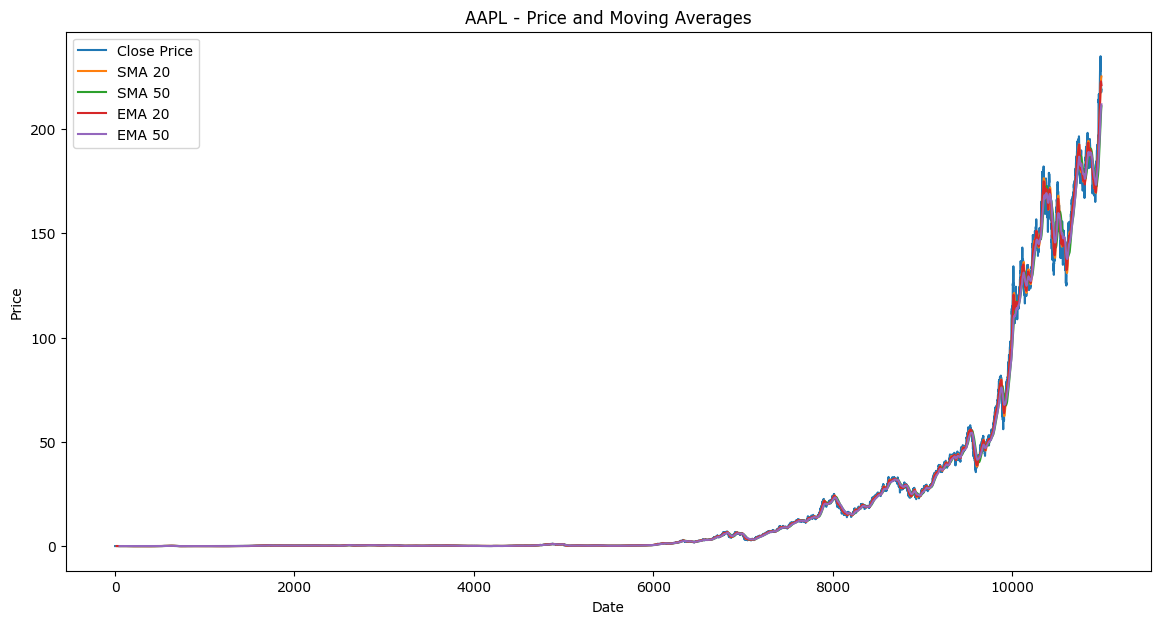

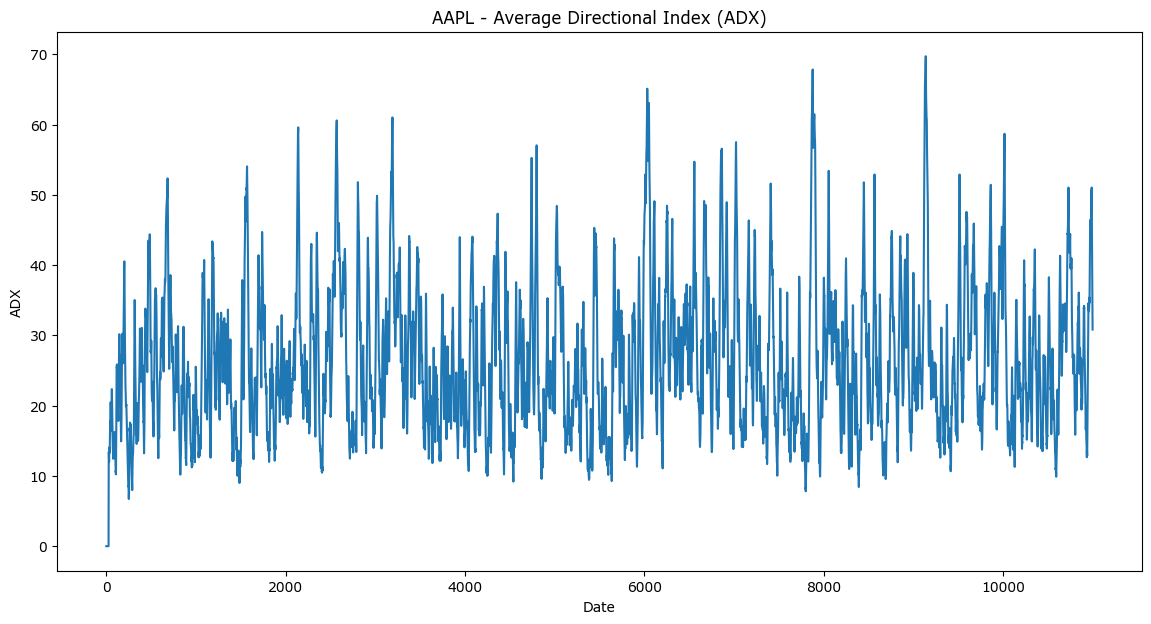

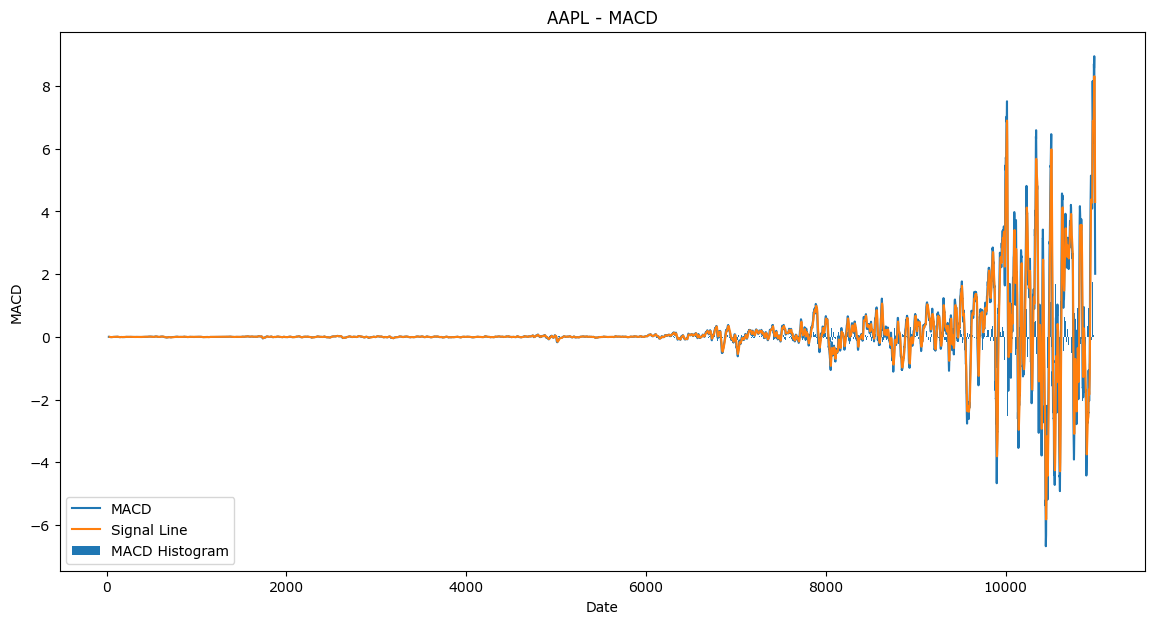

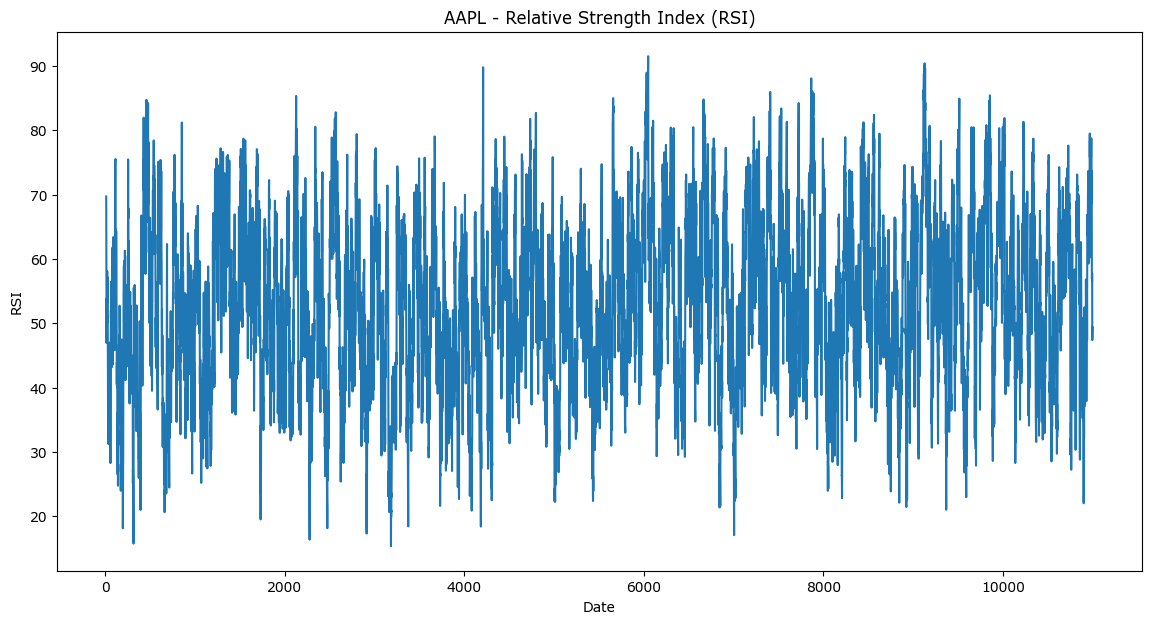

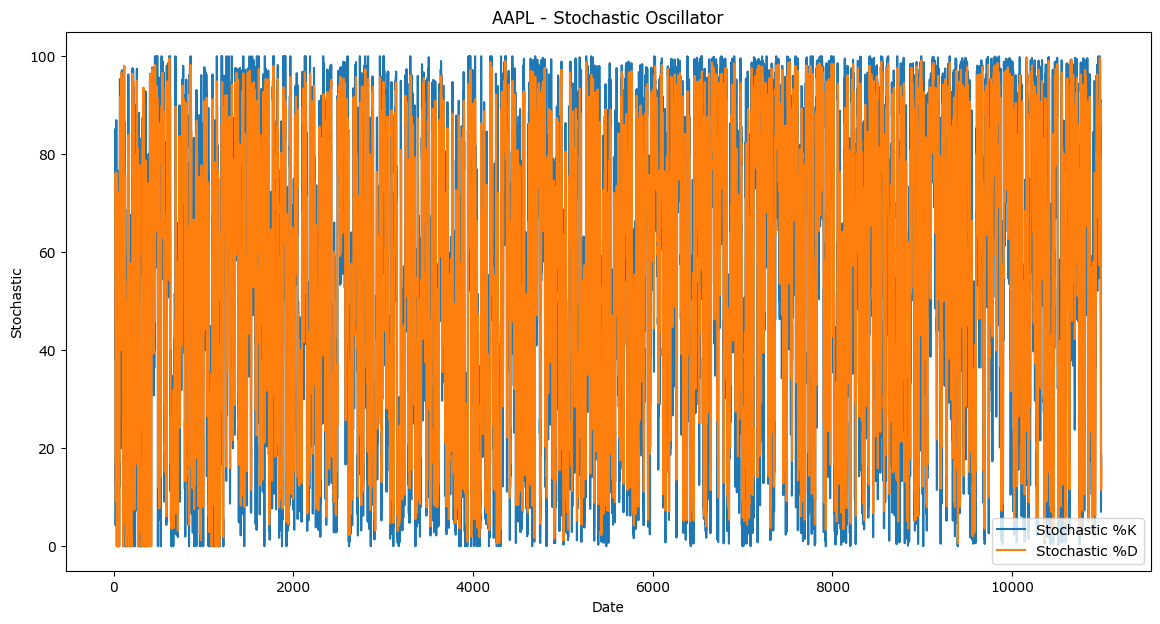

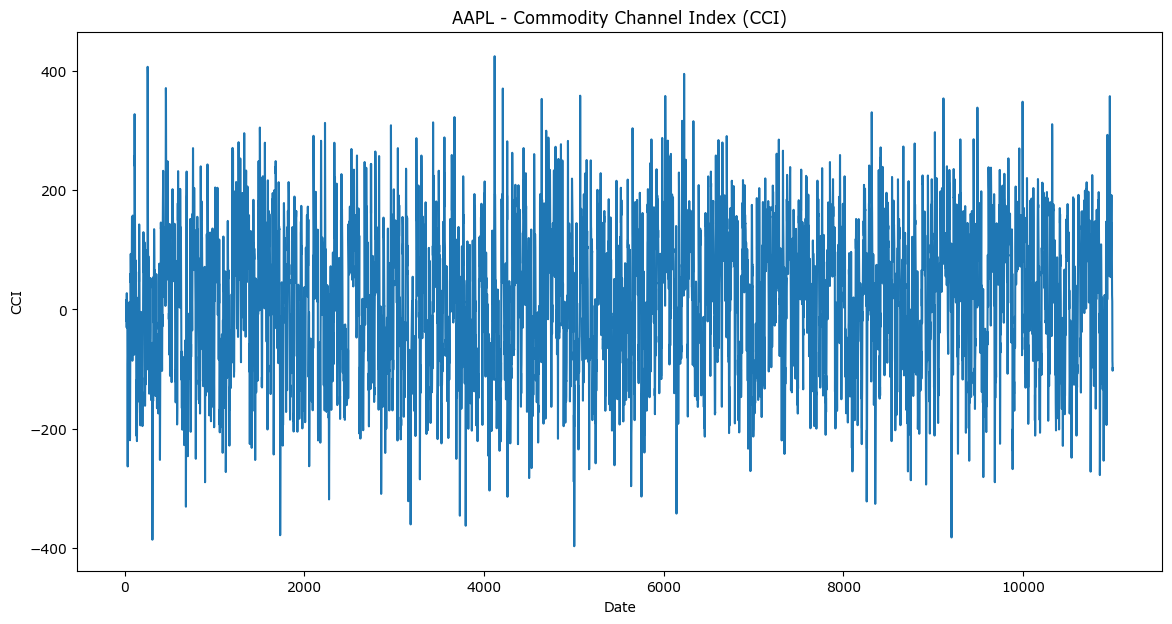

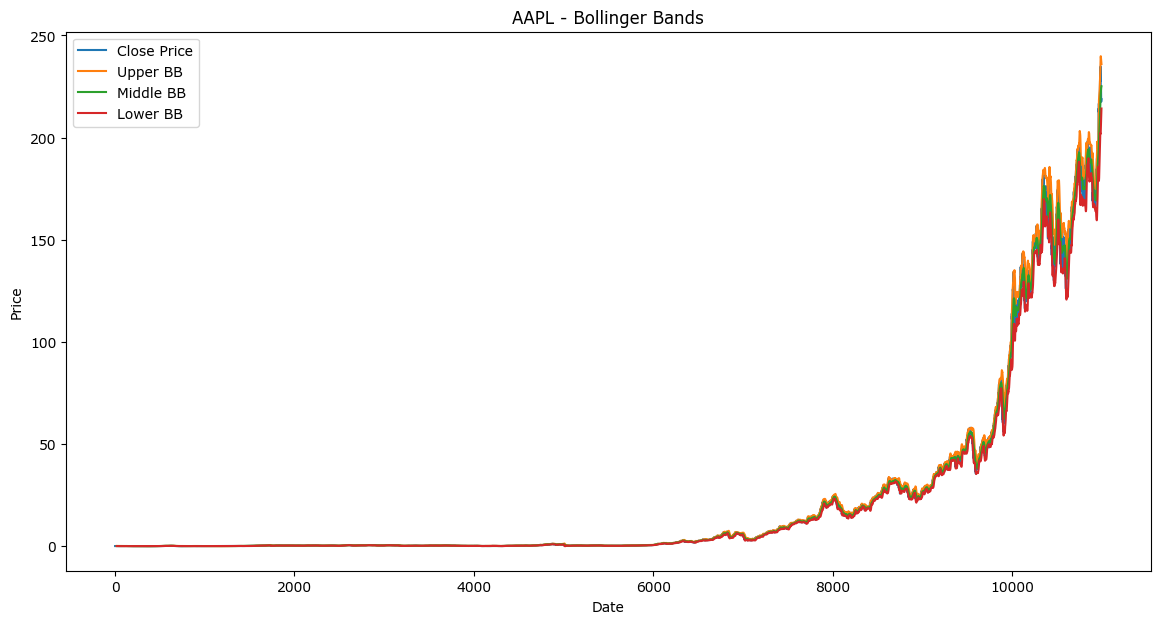

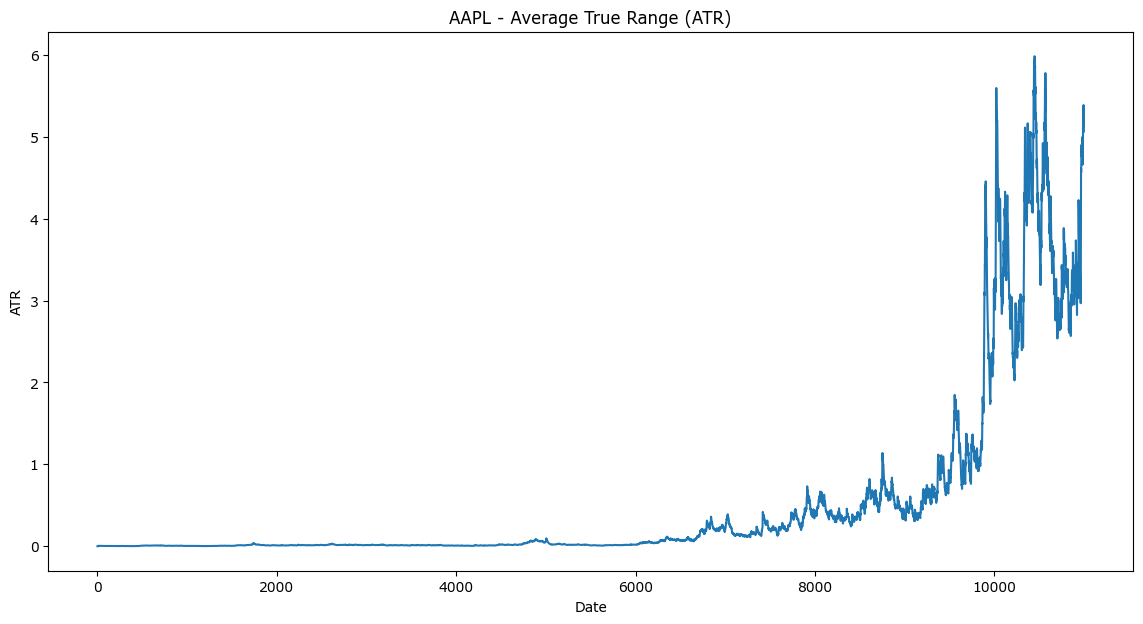

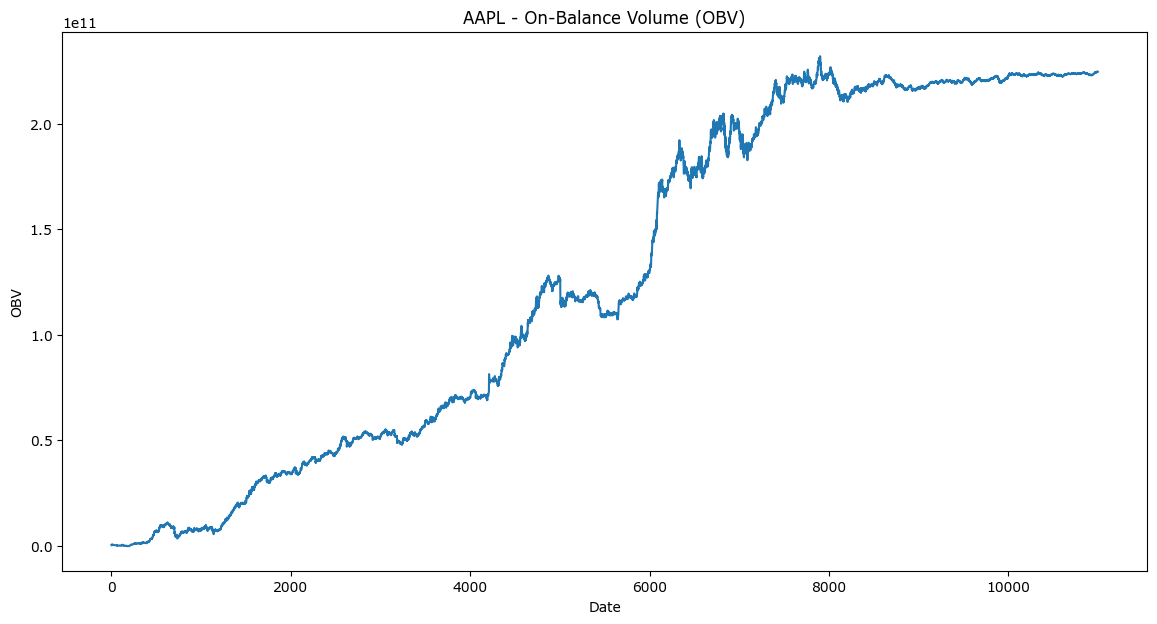

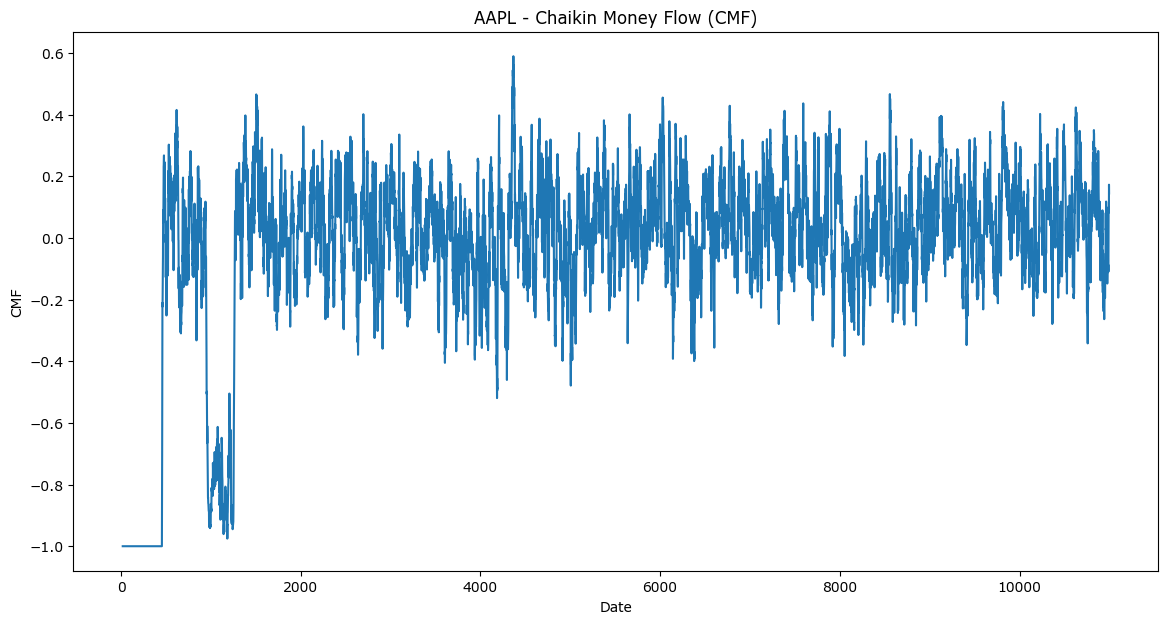

In [4]:
# Usage example
csv_path = r"C:\Users\doff n\Desktop\doffneri\week1\src\yfinance_data\AAPL_historical_data.csv"
analyzer = StockAnalyzer(csv_path, "AAPL")
analyzer.analyze()

## AMZN Analyzer

C:\Users\doff n\AppData\Local\Temp\ipykernel_14016\557101003.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill NaN values


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'SMA20', 'SMA50', 'EMA20', 'EMA50', 'MACD',
       'MACD_Signal', 'MACD_Diff', 'ADX', 'RSI', 'Stoch_K', 'Stoch_D', 'CCI',
       'BB_High', 'BB_Low', 'BB_Mid', 'ATR', 'OBV', 'CMF'],
      dtype='object')
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4 1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  SMA20  ...  RSI  Stoch_K  Stoch_D  CCI  BB_High  \
0        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
1        0.0           0.0    NaN  ...  NaN      NaN     

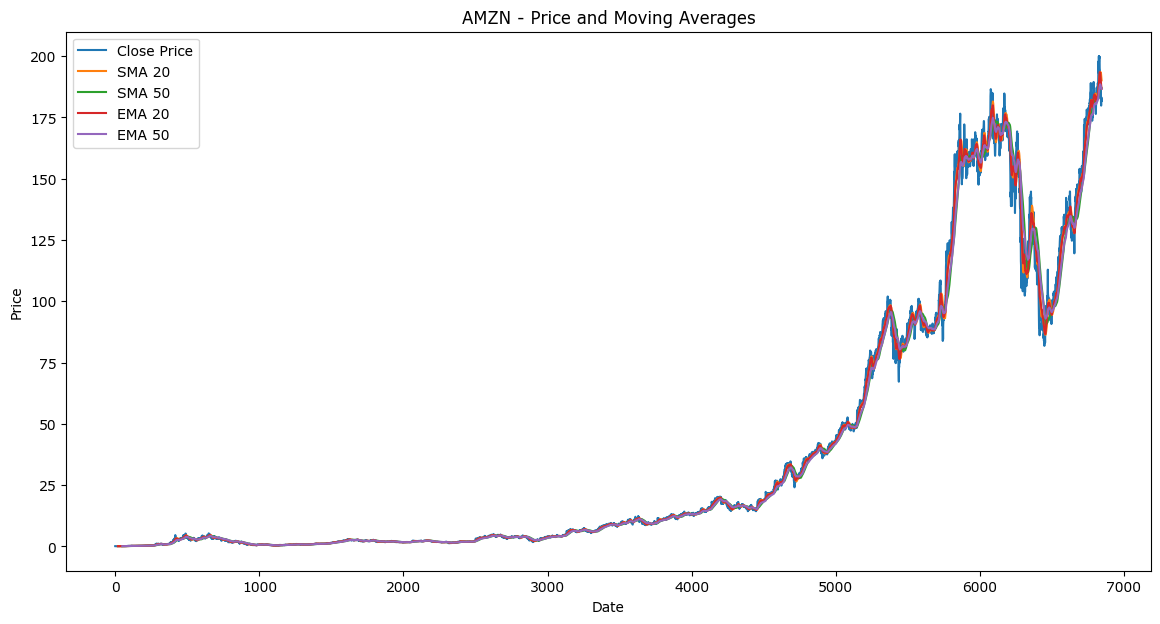

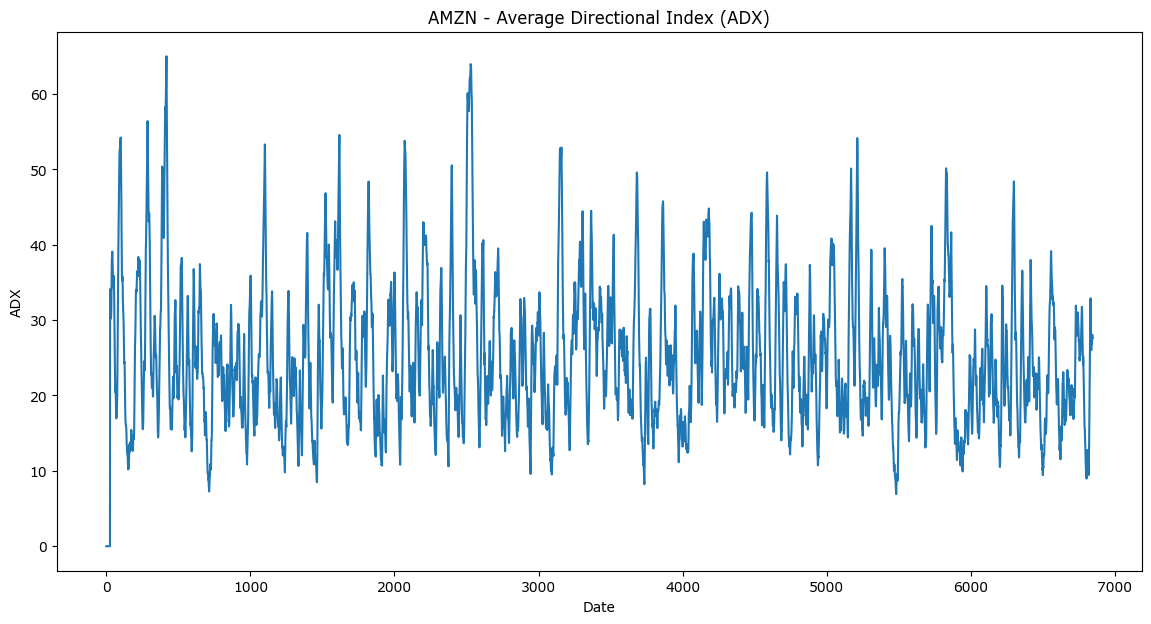

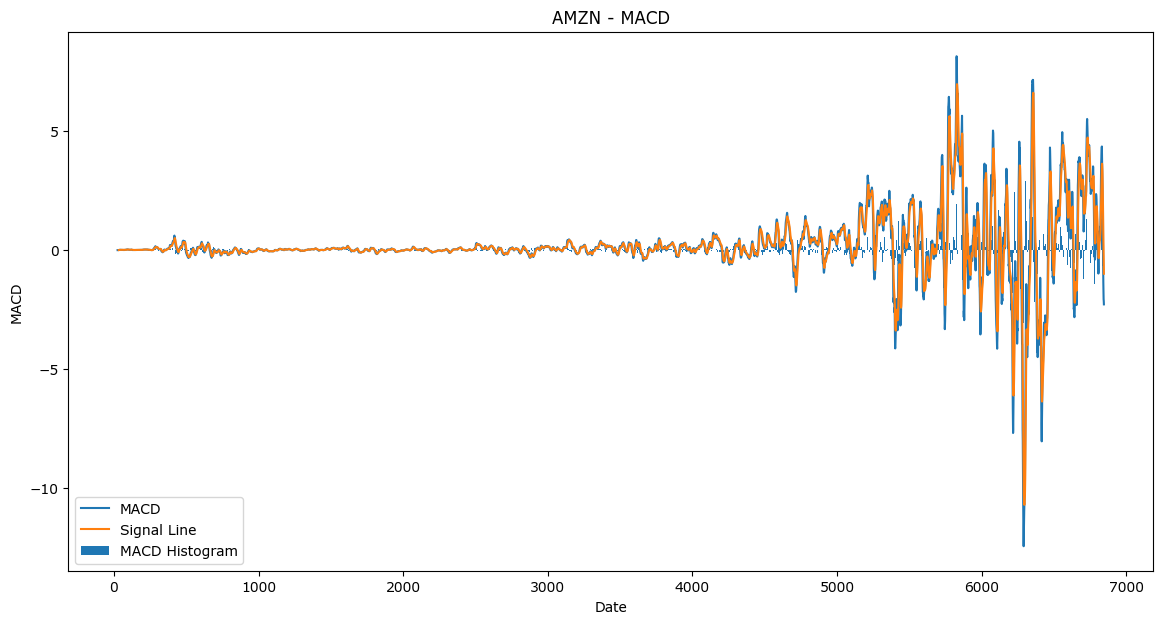

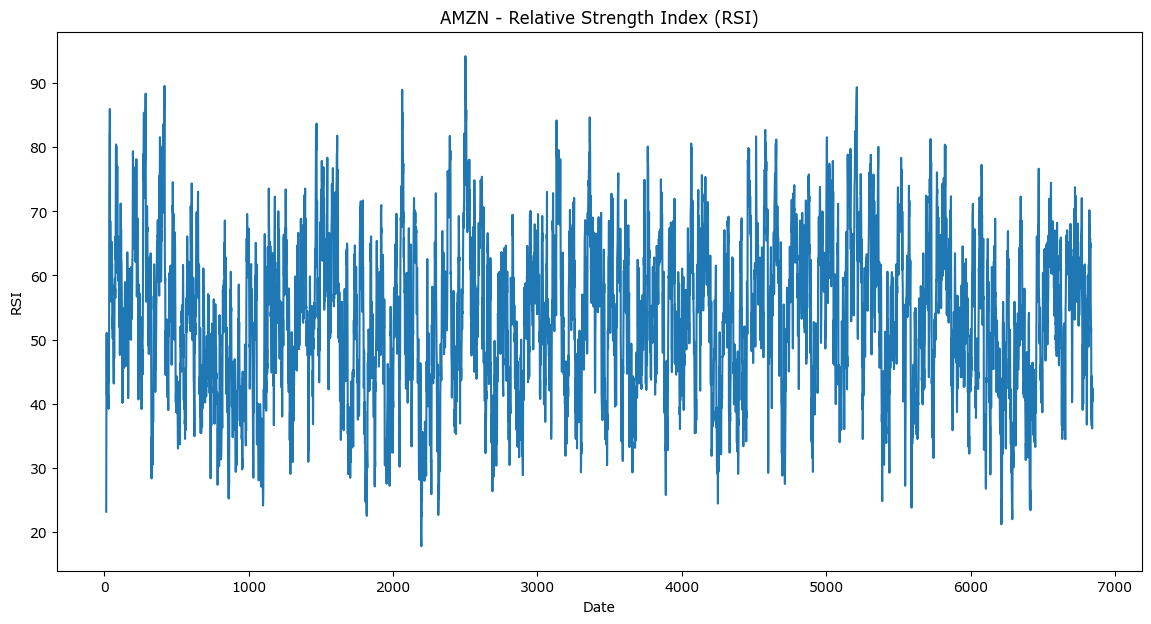

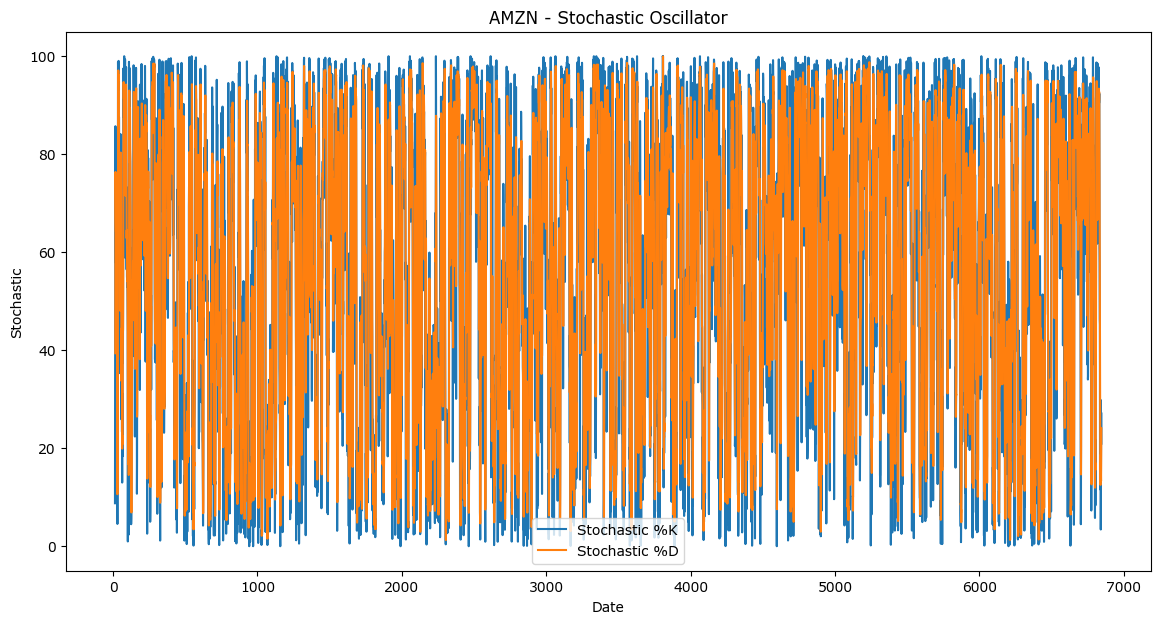

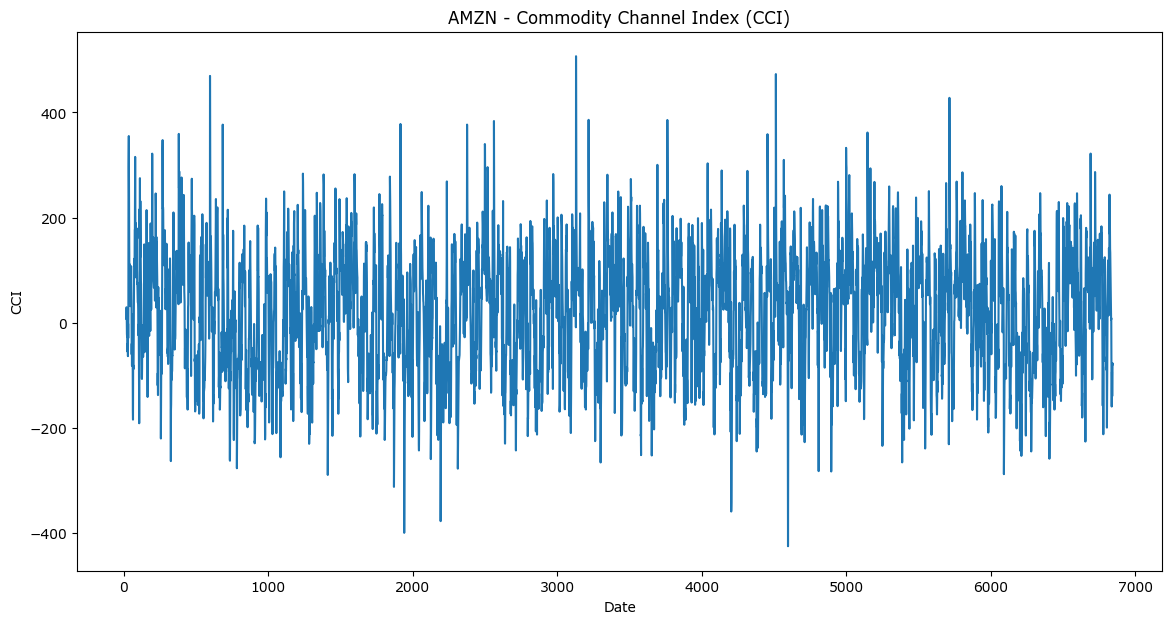

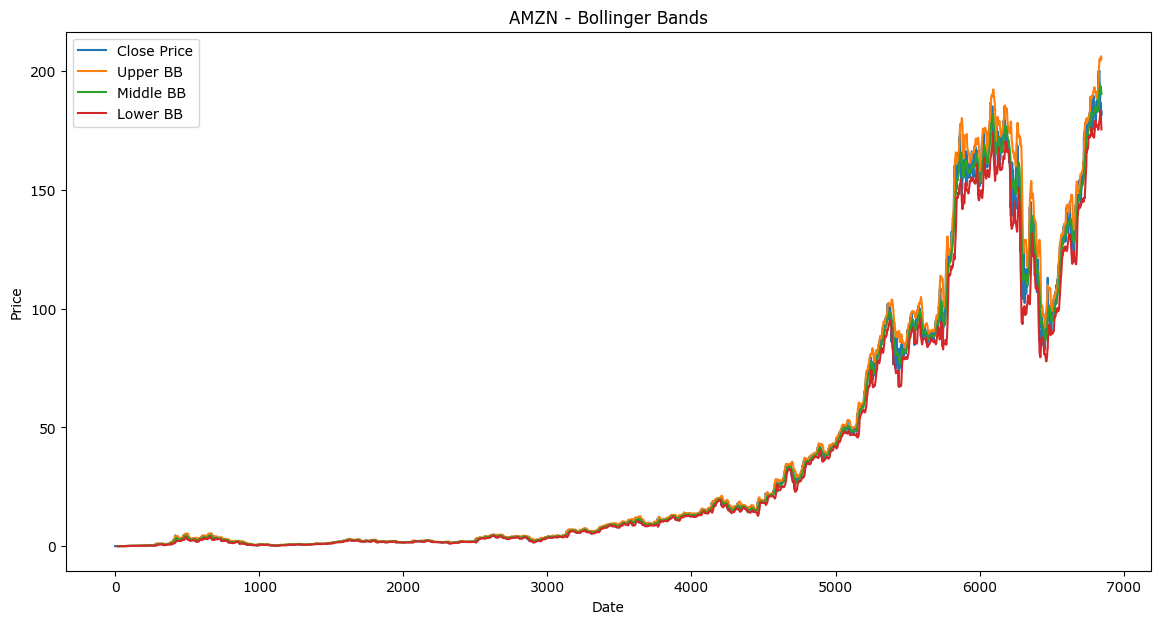

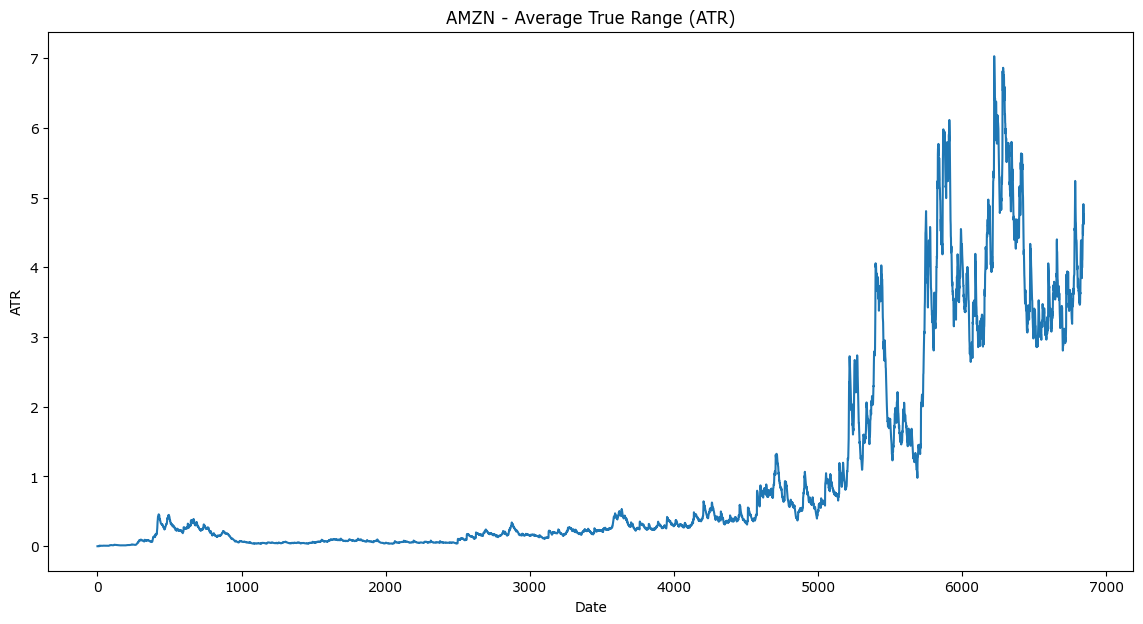

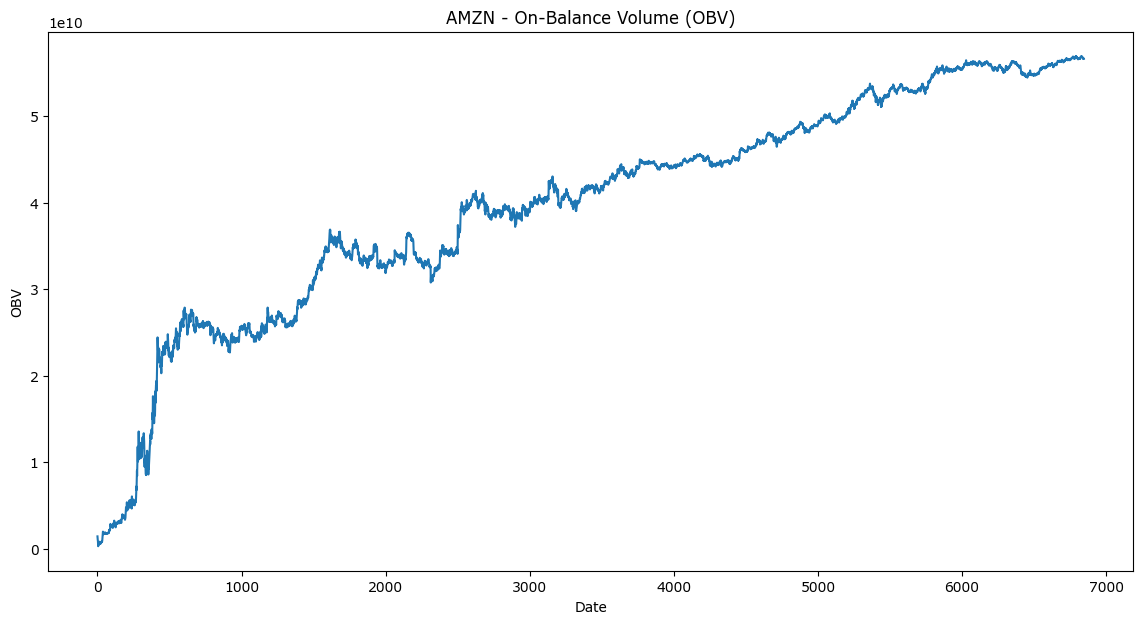

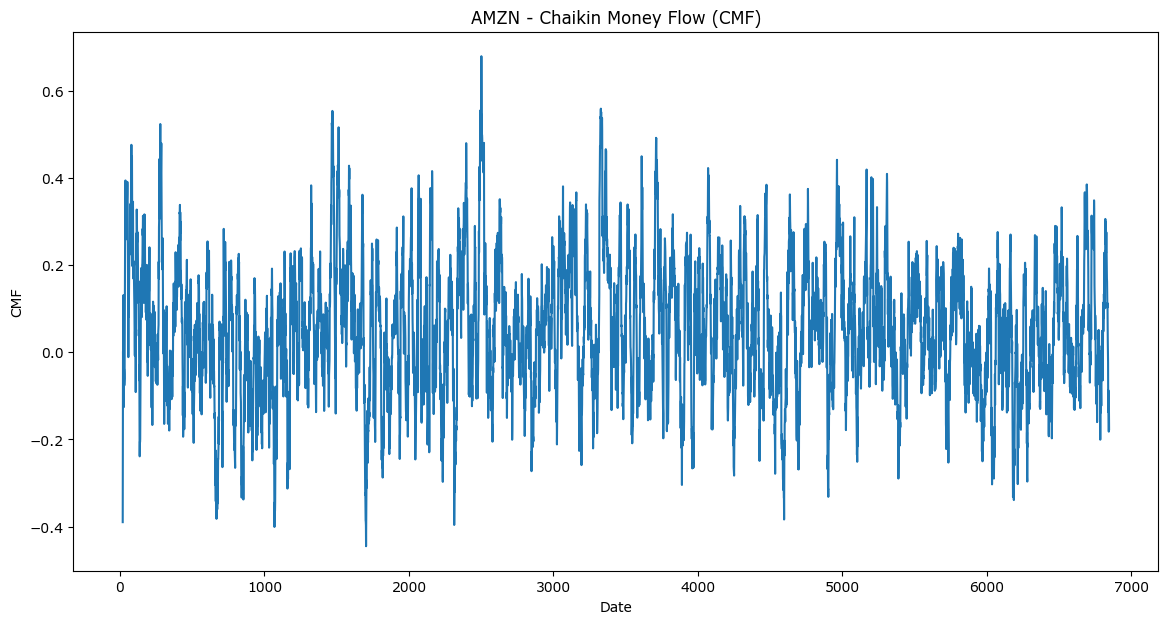

In [5]:
# Usage example
csv_path = r"C:\Users\doff n\Desktop\doffneri\week1\src\yfinance_data\AMZN_historical_data.csv"
analyzer = StockAnalyzer(csv_path, "AMZN")
analyzer.analyze()

## GOOG Analyzer

C:\Users\doff n\AppData\Local\Temp\ipykernel_14016\557101003.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill NaN values


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'SMA20', 'SMA50', 'EMA20', 'EMA50', 'MACD',
       'MACD_Signal', 'MACD_Diff', 'ADX', 'RSI', 'Stoch_K', 'Stoch_D', 'CCI',
       'BB_High', 'BB_Low', 'BB_Mid', 'ATR', 'OBV', 'CMF'],
      dtype='object')
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1 2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2 2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3 2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4 2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  SMA20  ...  RSI  Stoch_K  Stoch_D  CCI  BB_High  \
0        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
1        0.0           0.0    NaN  ...  NaN      NaN      NaN  

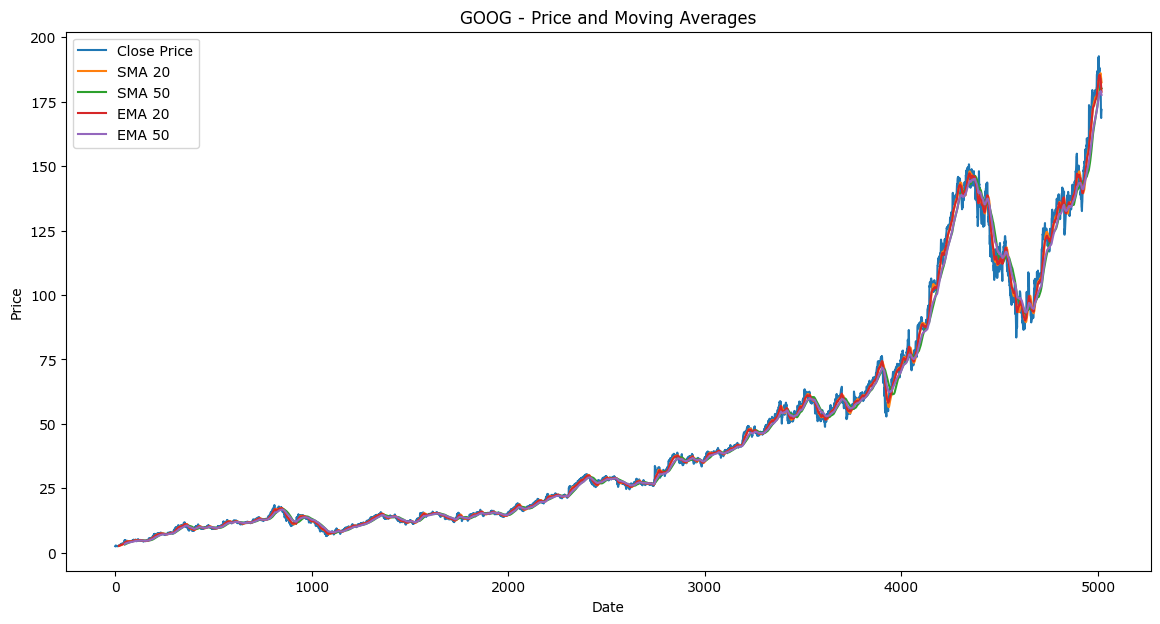

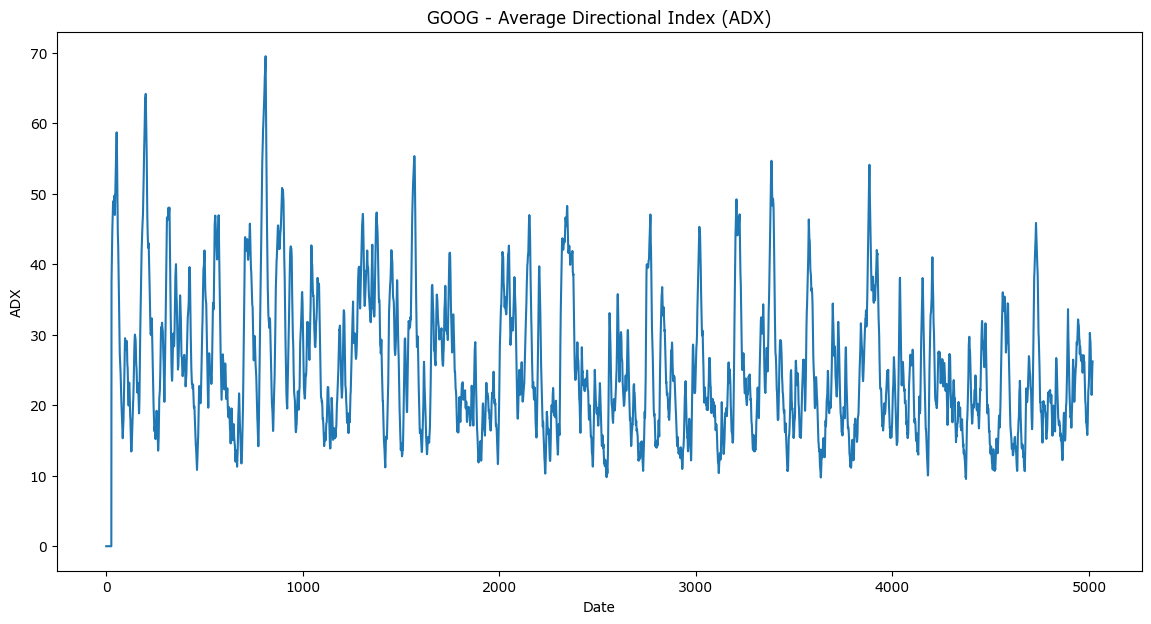

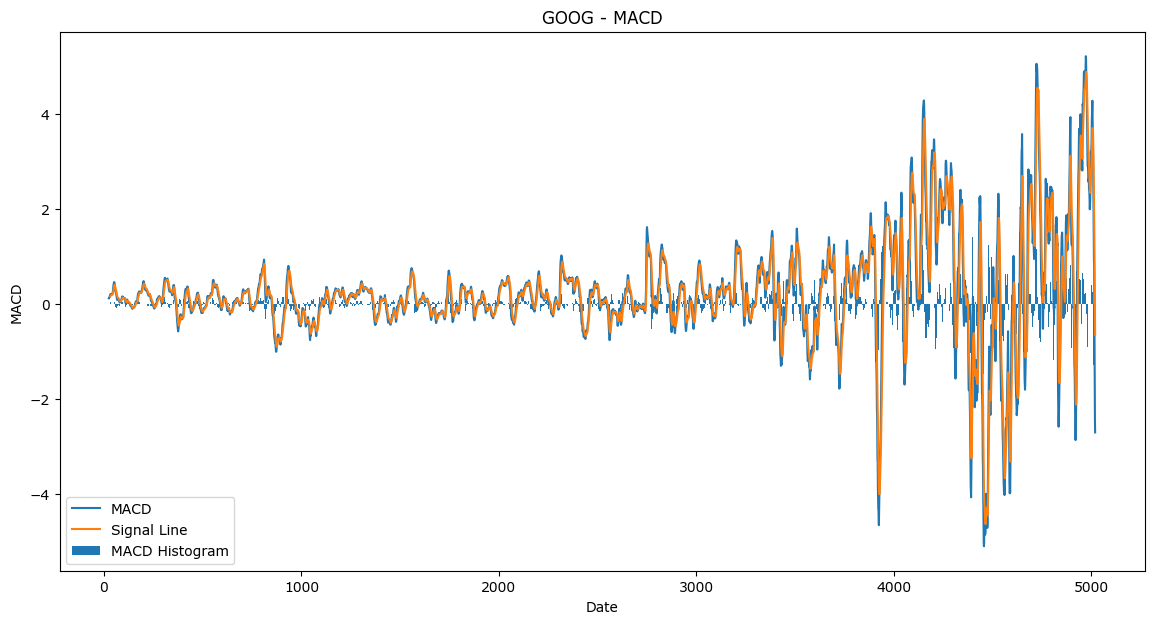

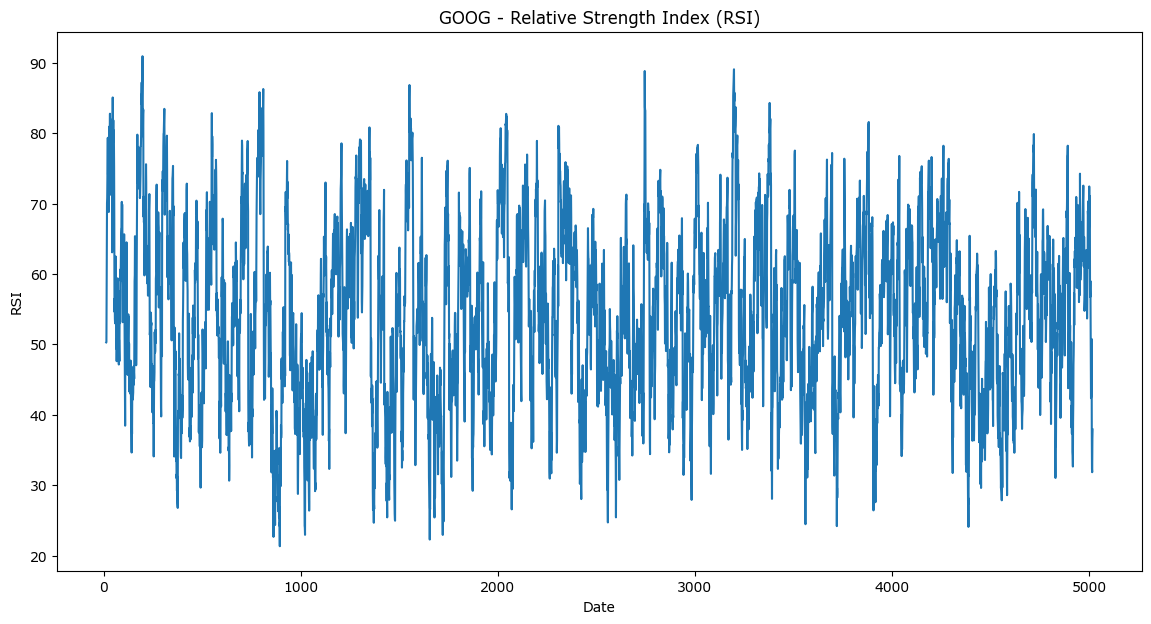

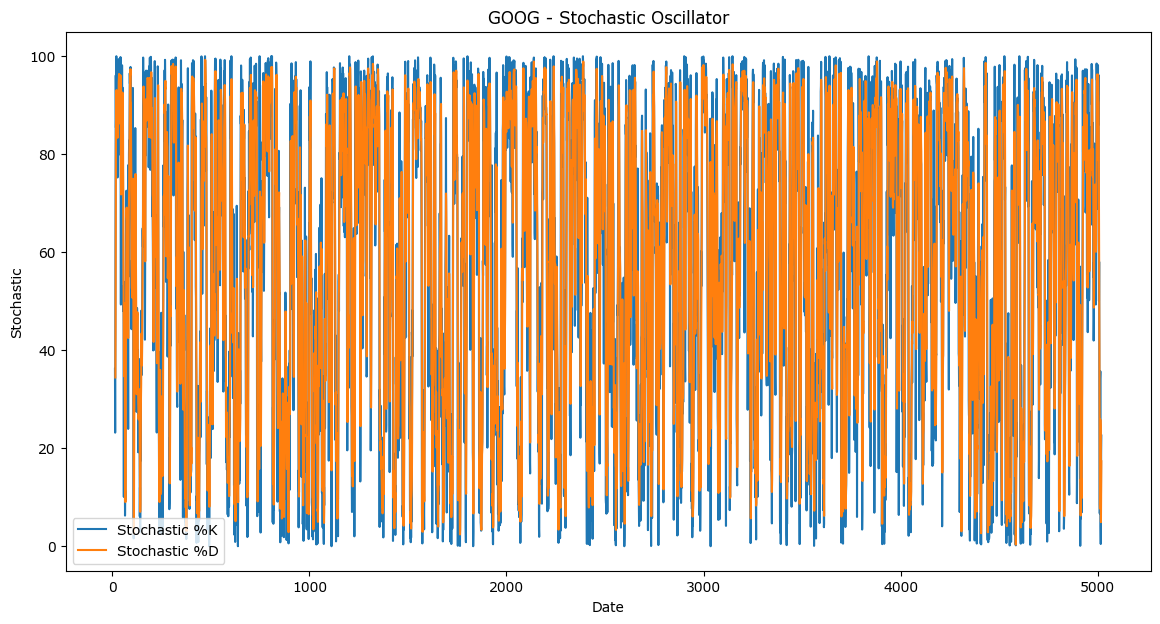

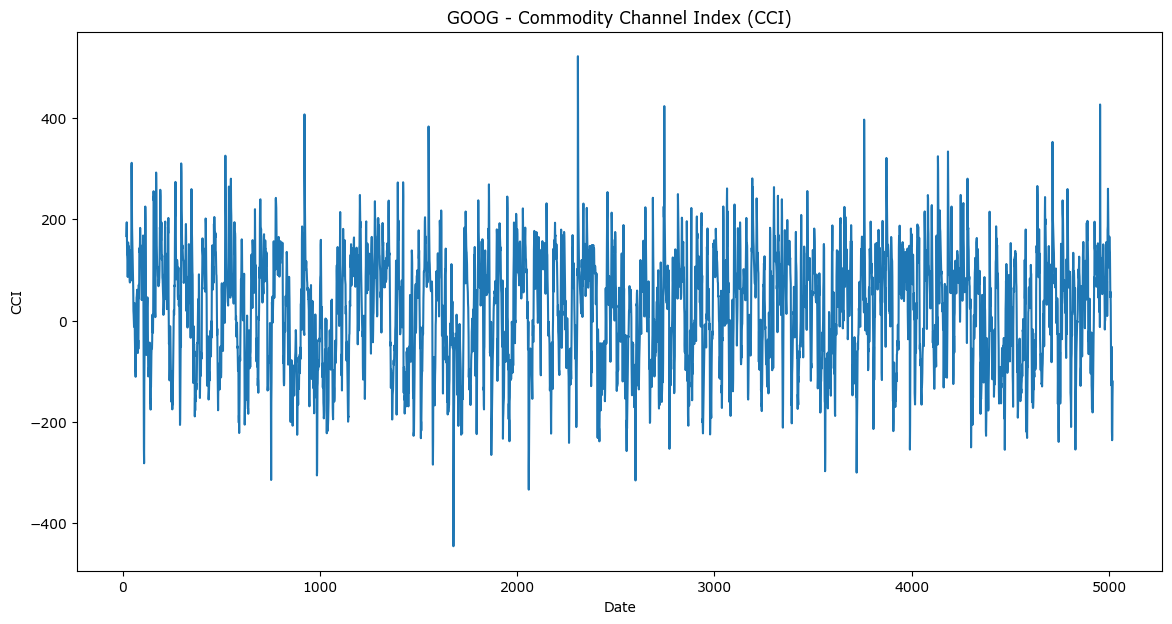

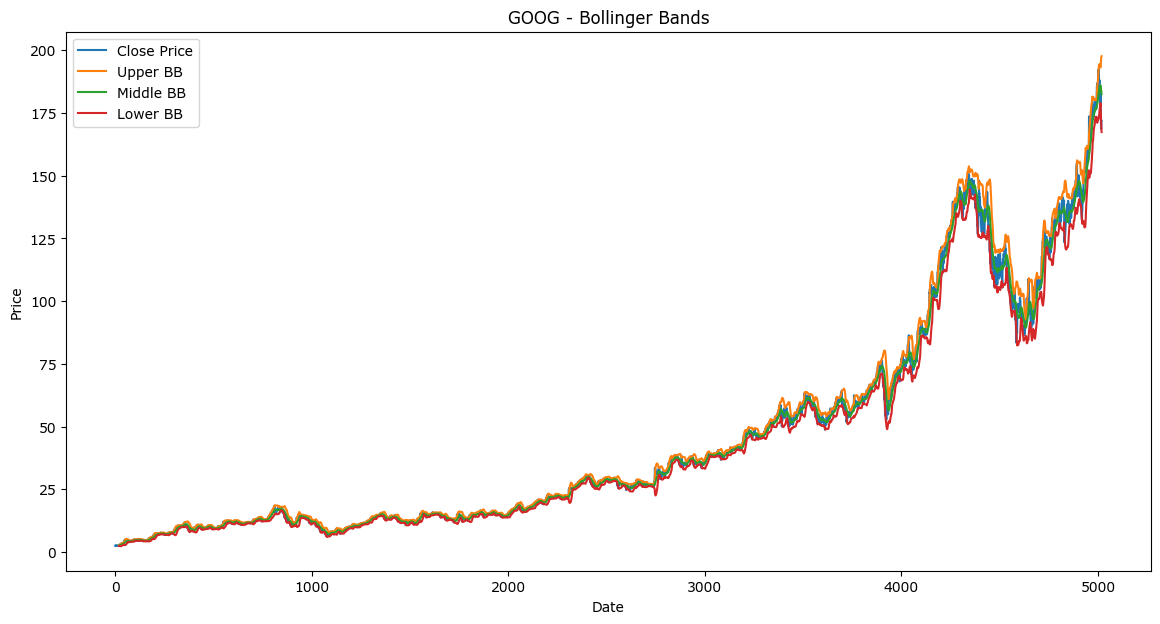

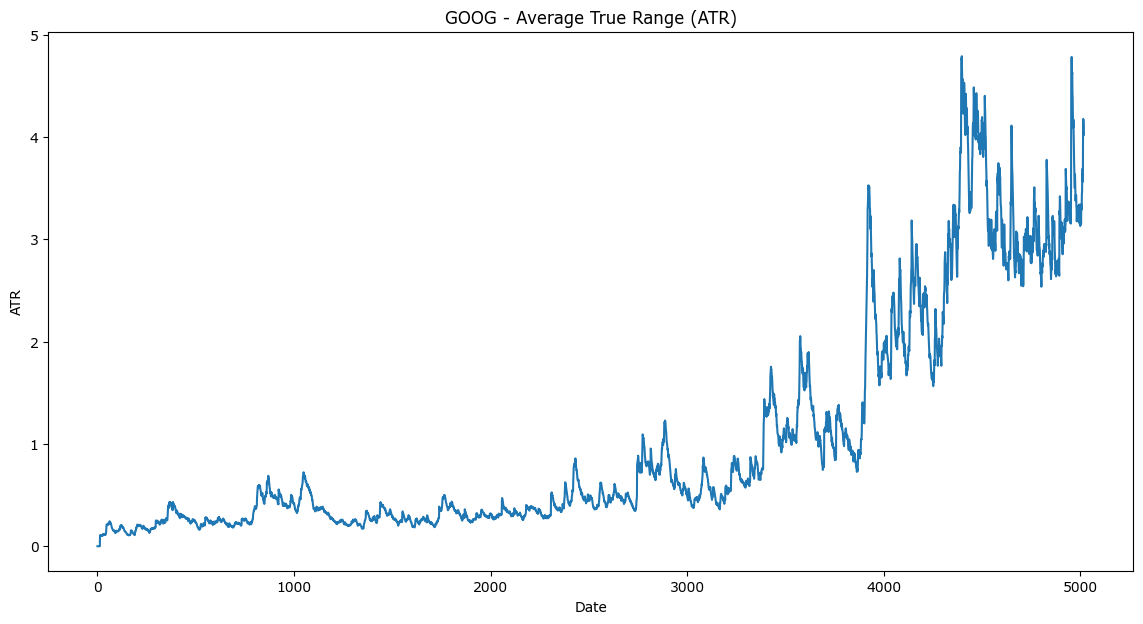

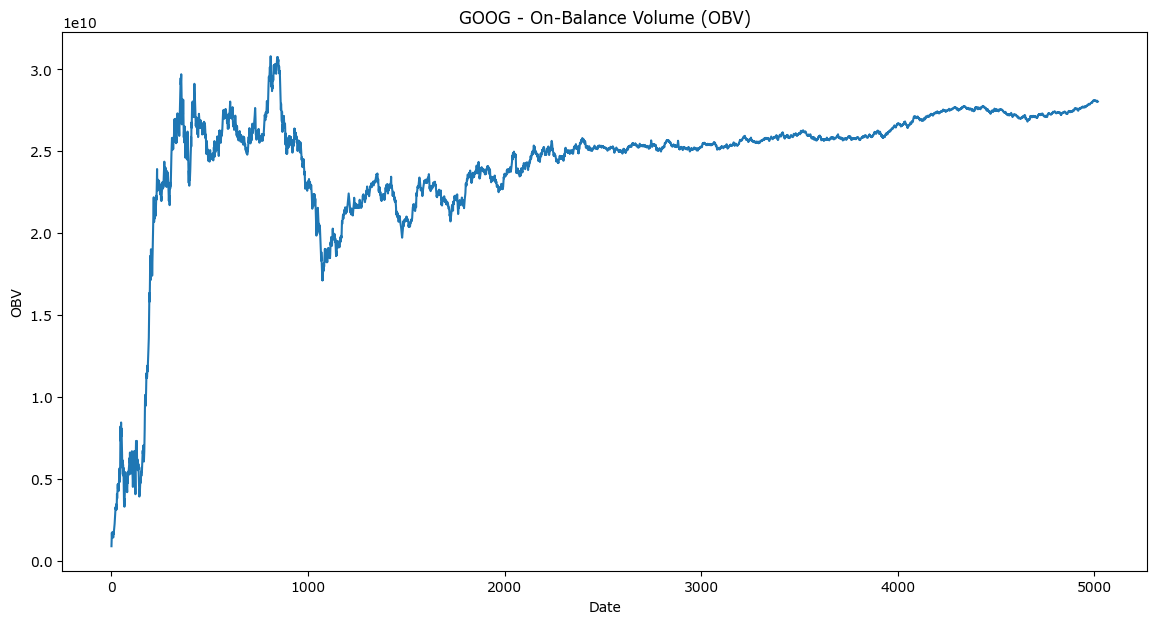

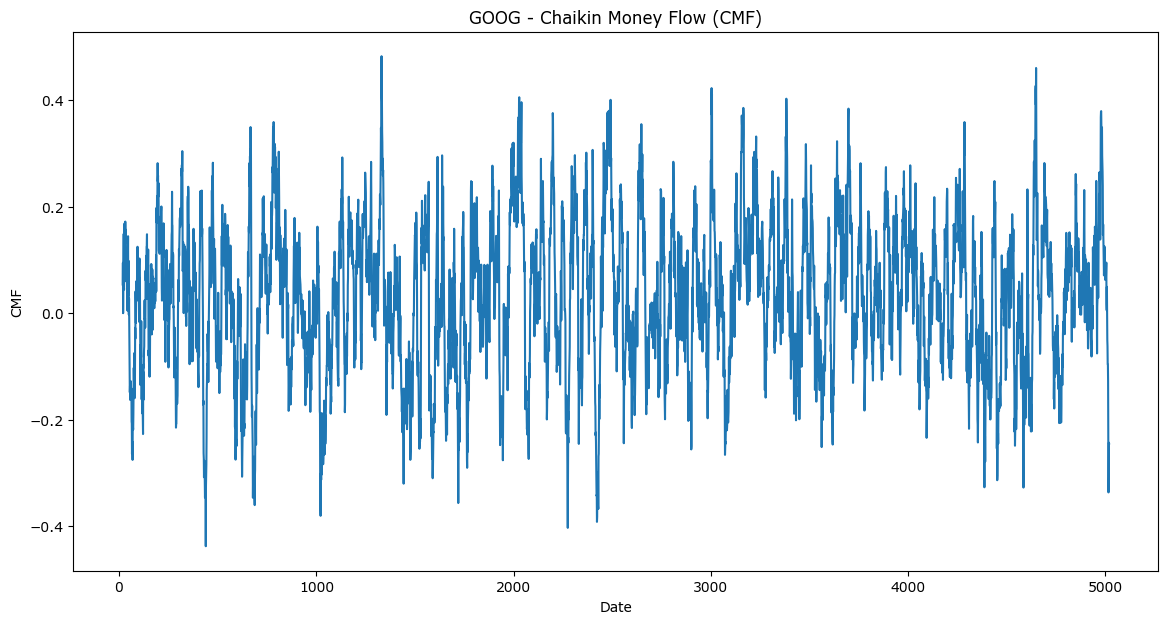

In [6]:
# Usage example
csv_path = r"C:\Users\doff n\Desktop\doffneri\week1\src\yfinance_data\GOOG_historical_data.csv"
analyzer = StockAnalyzer(csv_path, "GOOG")
analyzer.analyze()

## META Analyzer

C:\Users\doff n\AppData\Local\Temp\ipykernel_14016\557101003.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill NaN values


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'SMA20', 'SMA50', 'EMA20', 'EMA50', 'MACD',
       'MACD_Signal', 'MACD_Diff', 'ADX', 'RSI', 'Stoch_K', 'Stoch_D', 'CCI',
       'BB_High', 'BB_Low', 'BB_Mid', 'ATR', 'OBV', 'CMF'],
      dtype='object')
        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441  46704200   
1 2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087  81051600   
2 2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020  91631600   
3 2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143  57742500   
4 2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173  60512900   

   Dividends  Stock Splits  SMA20  ...  RSI  Stoch_K  Stoch_D  CCI  BB_High  \
0        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
1        0.0           0.0    NaN  ...  NaN  

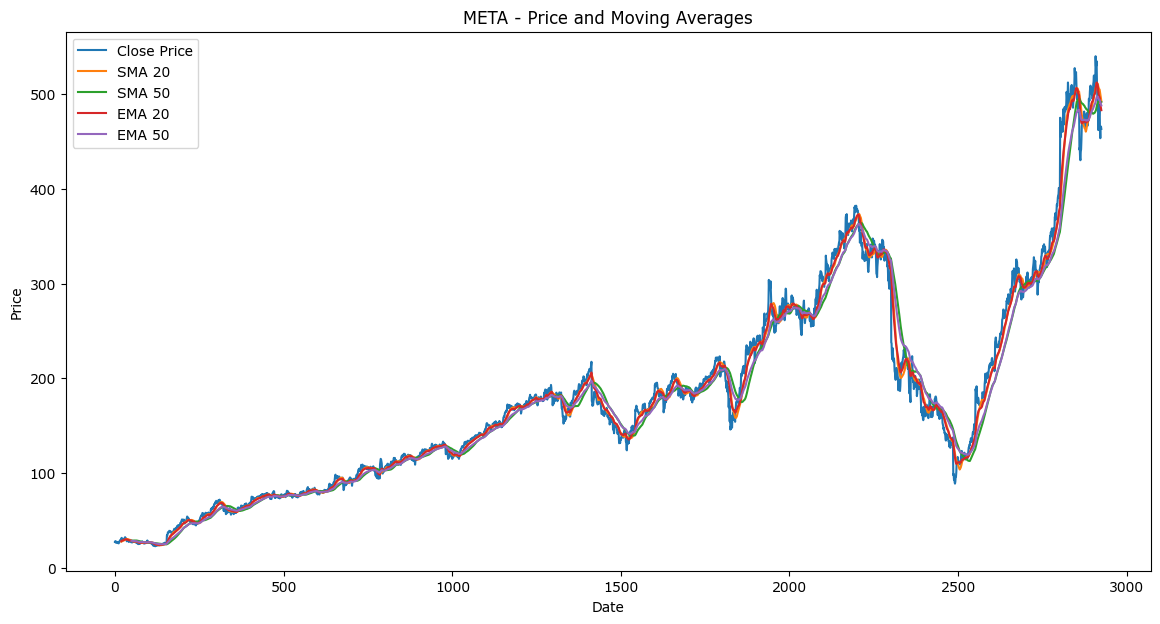

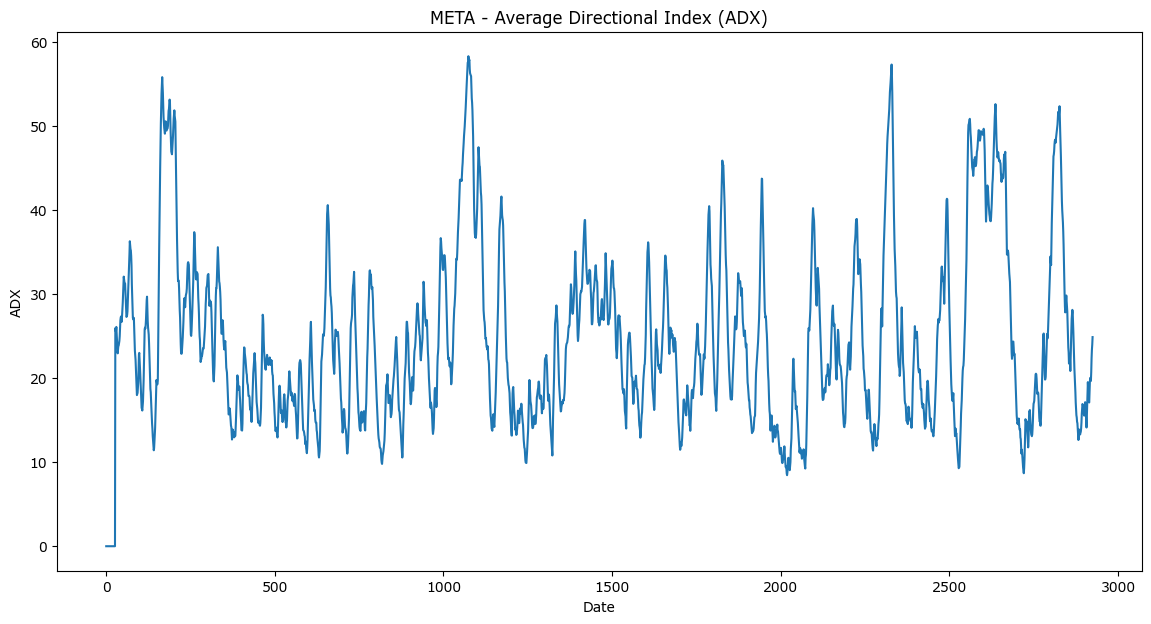

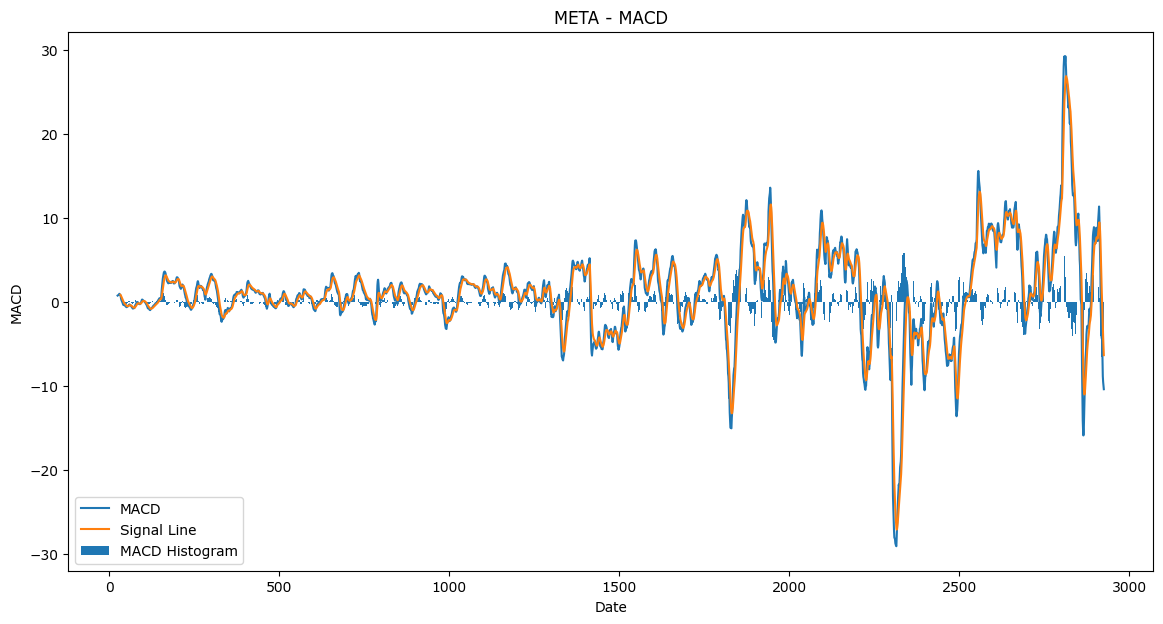

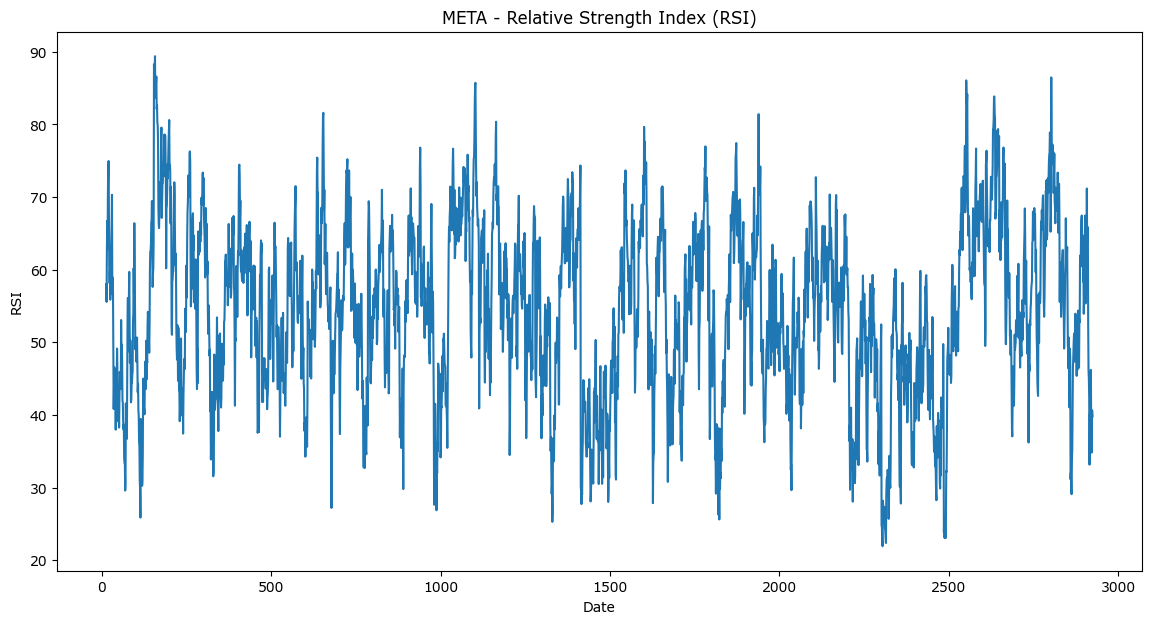

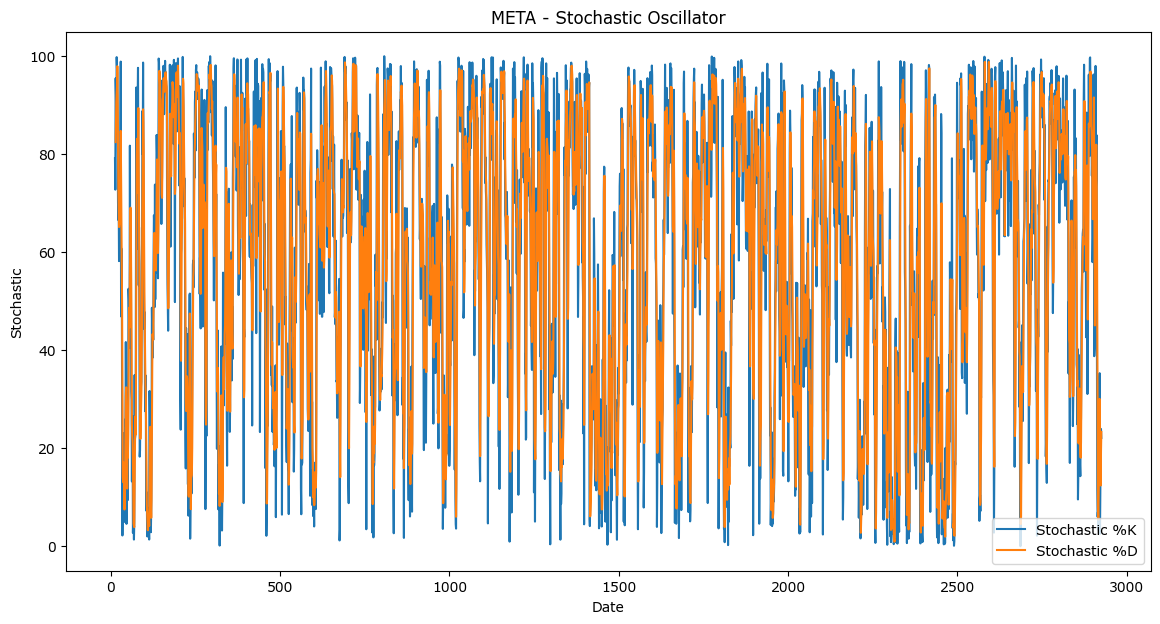

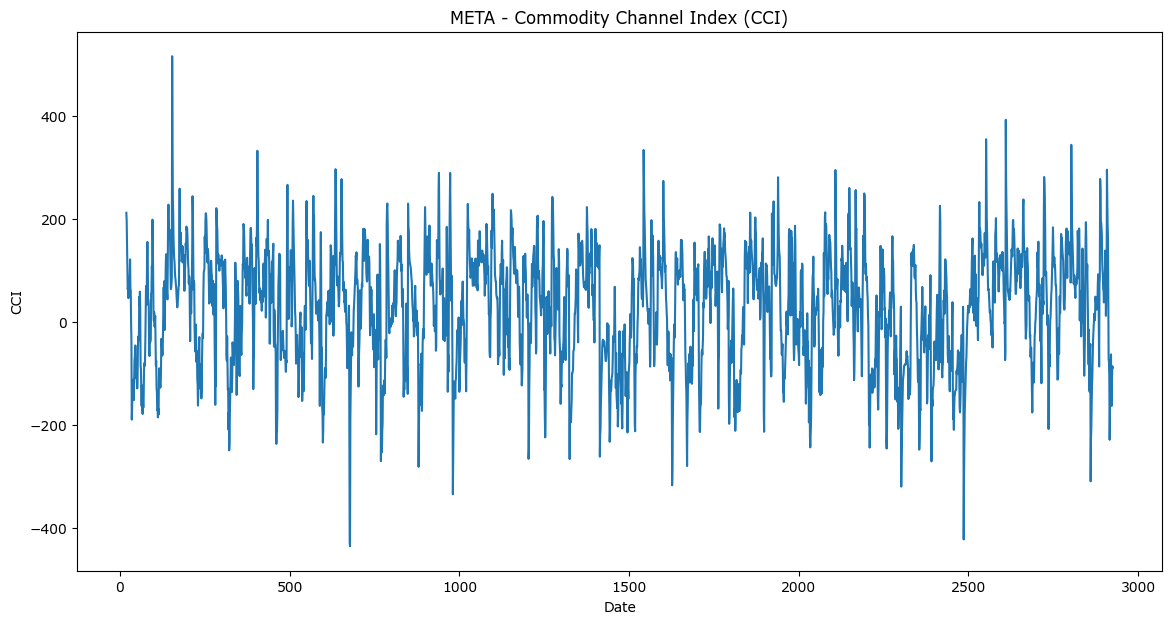

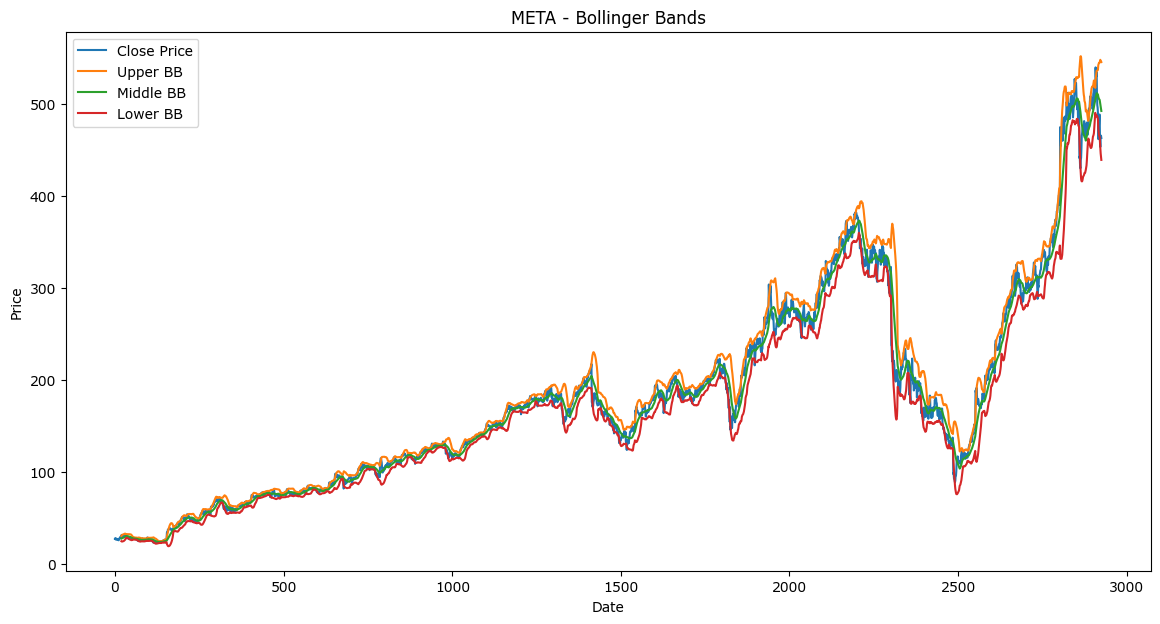

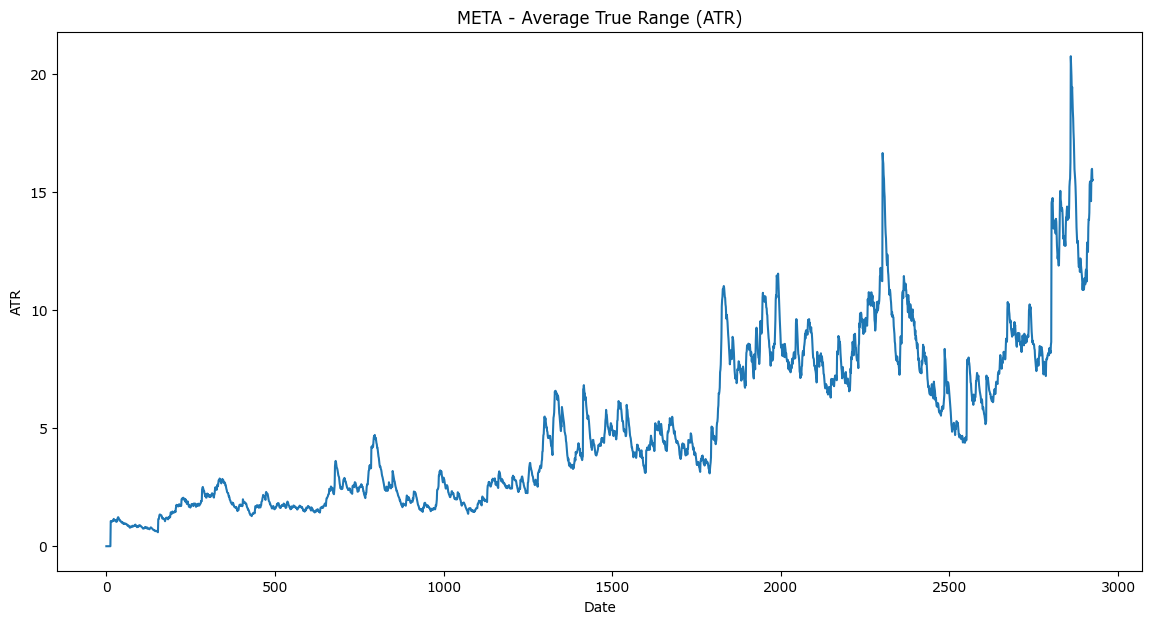

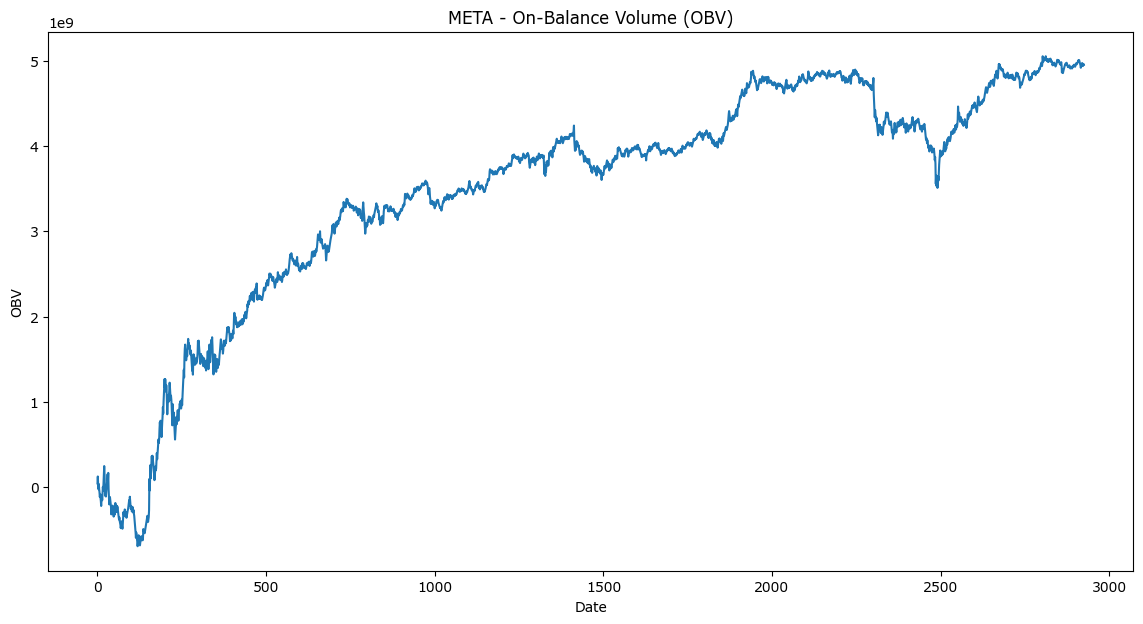

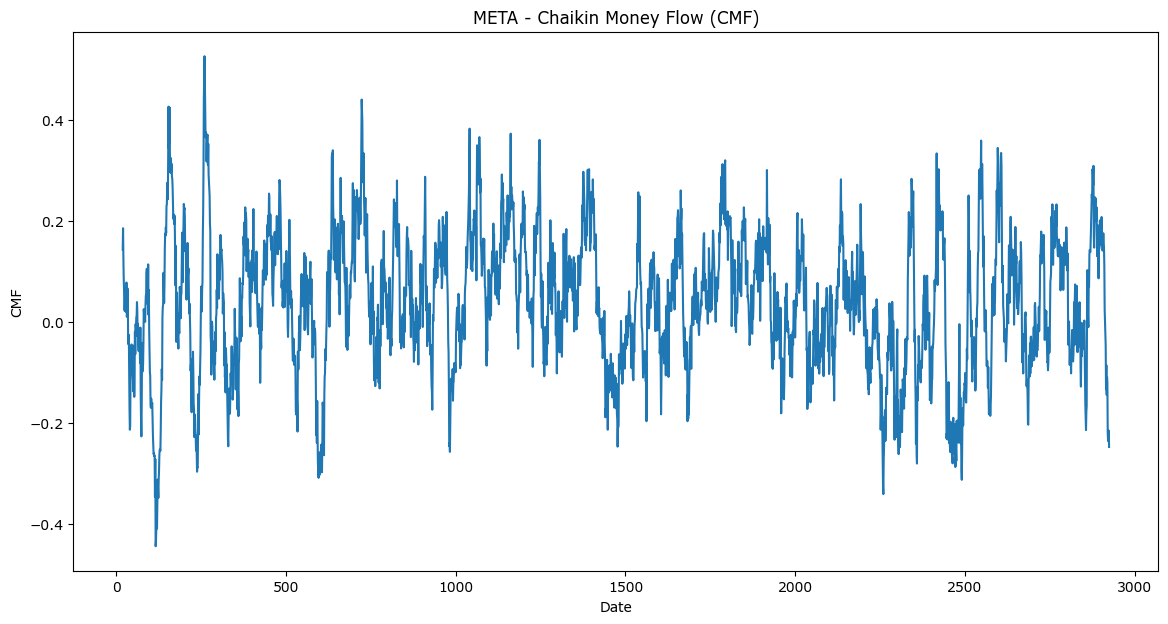

In [7]:
# Usage example
csv_path = r"C:\Users\doff n\Desktop\doffneri\week1\src\yfinance_data\META_historical_data.csv"
analyzer = StockAnalyzer(csv_path, "META")
analyzer.analyze()

## MSFT Analyzer

C:\Users\doff n\AppData\Local\Temp\ipykernel_14016\557101003.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill NaN values


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'SMA20', 'SMA50', 'EMA20', 'EMA50', 'MACD',
       'MACD_Signal', 'MACD_Diff', 'ADX', 'RSI', 'Stoch_K', 'Stoch_D', 'CCI',
       'BB_High', 'BB_Low', 'BB_Mid', 'ATR', 'OBV', 'CMF'],
      dtype='object')
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1 1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2 1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
3 1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
4 1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   

   Dividends  Stock Splits  SMA20  ...  RSI  Stoch_K  Stoch_D  CCI  BB_High  \
0        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
1        0.0           0.0    NaN  ...  NaN      NaN     

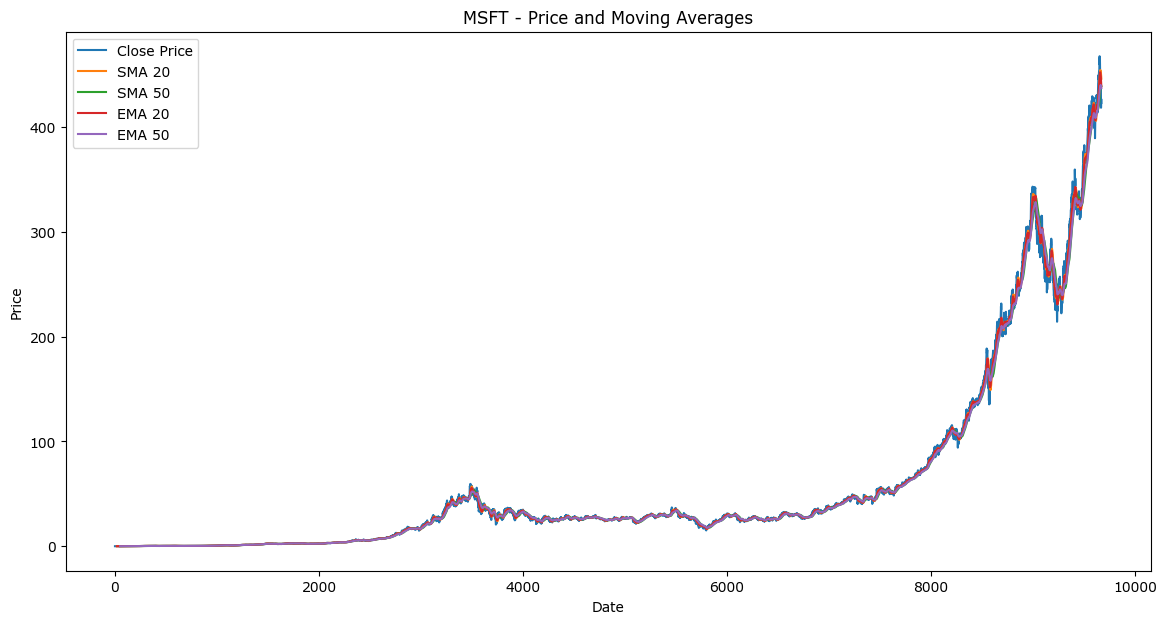

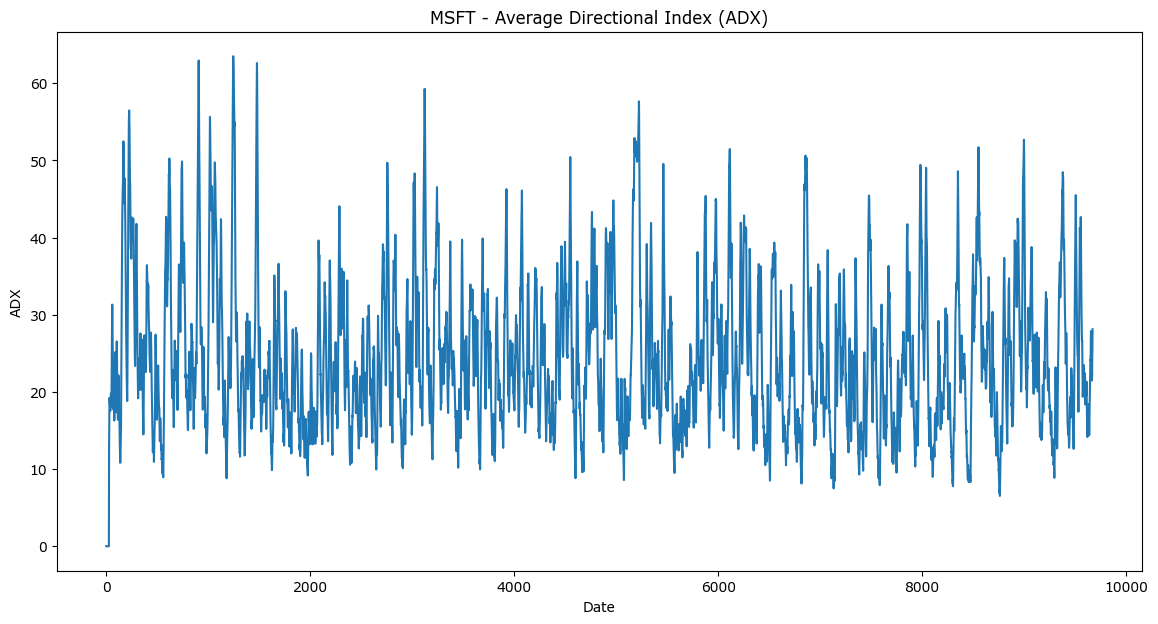

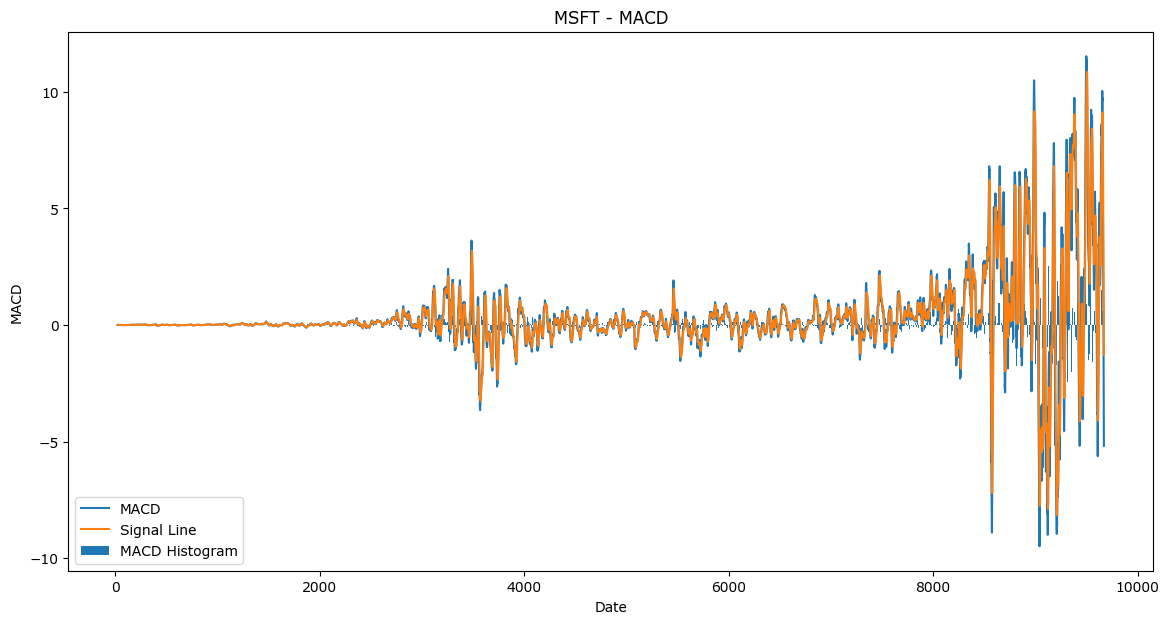

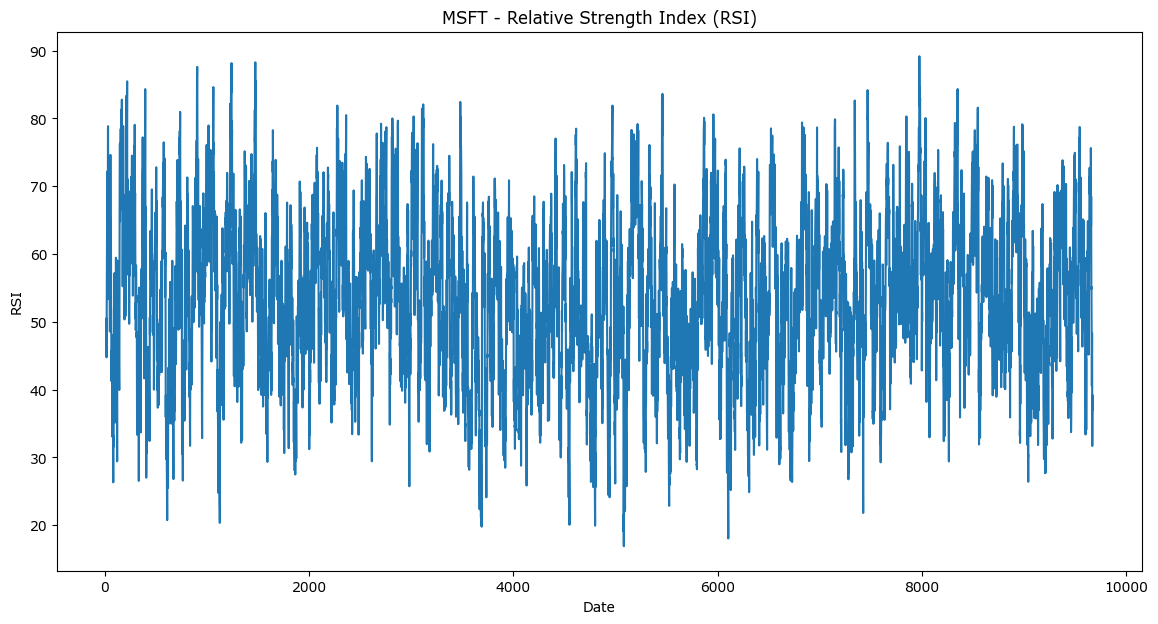

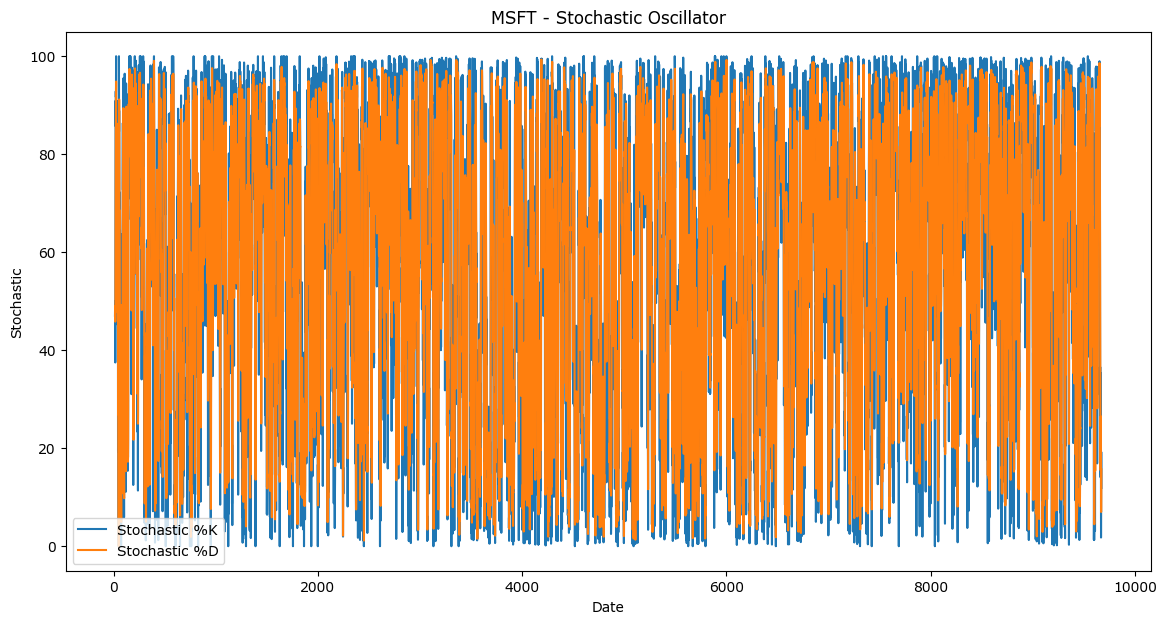

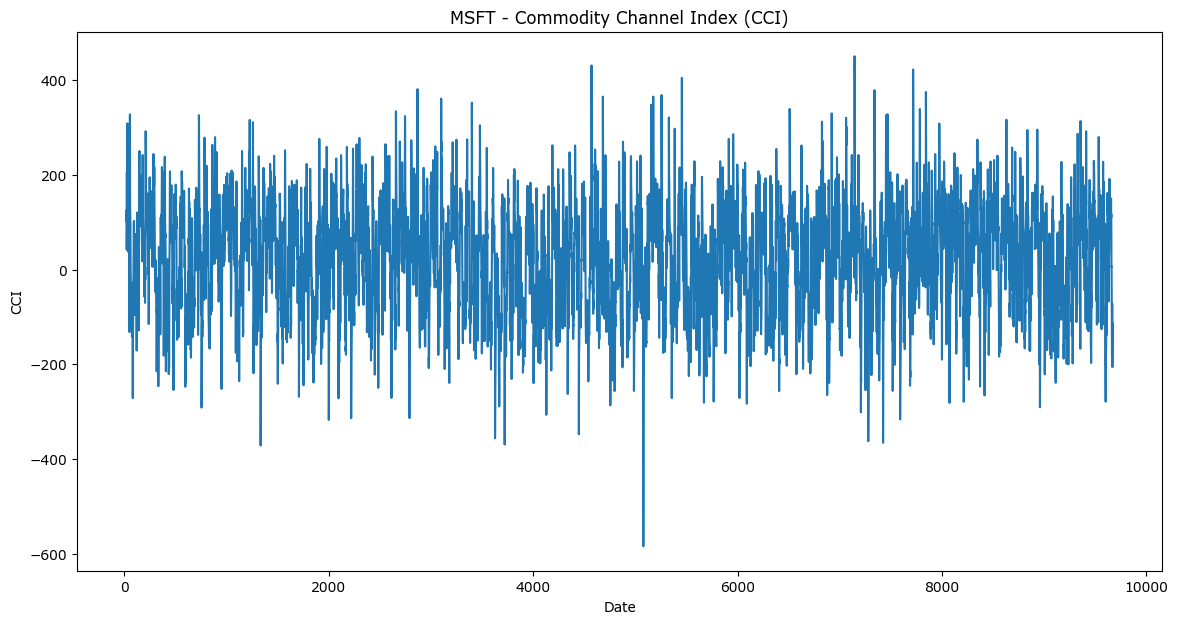

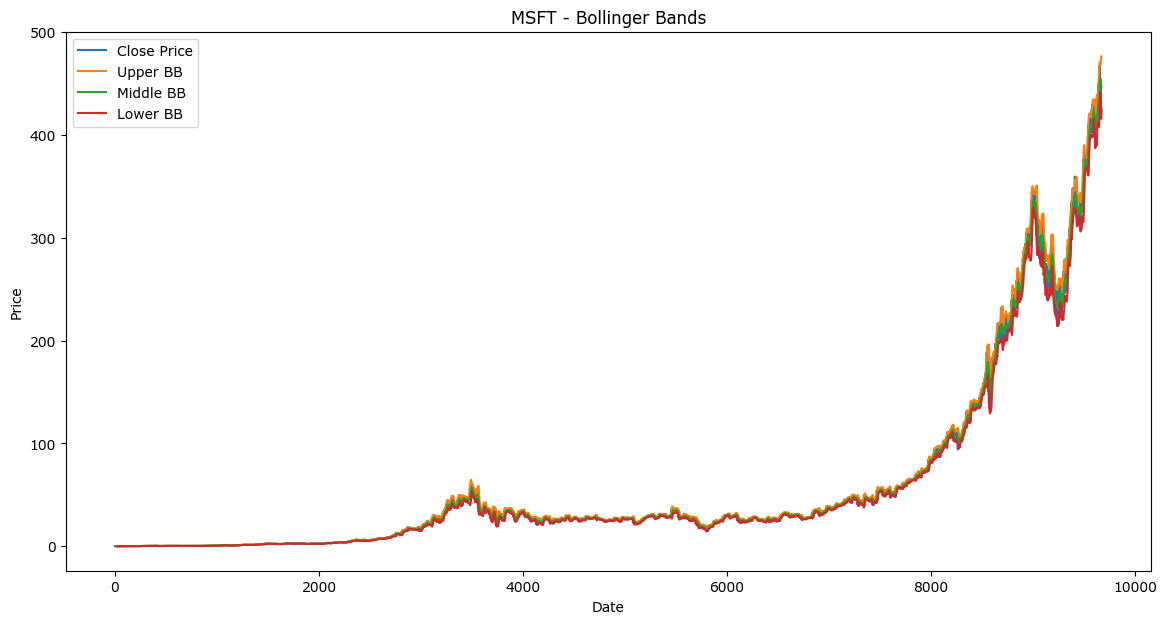

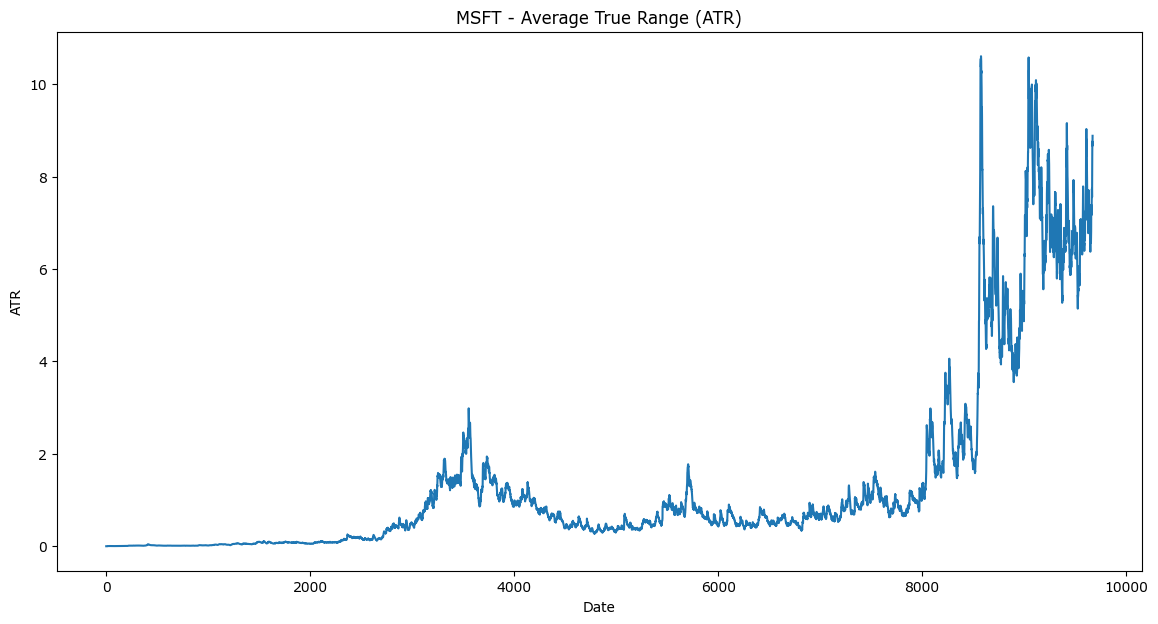

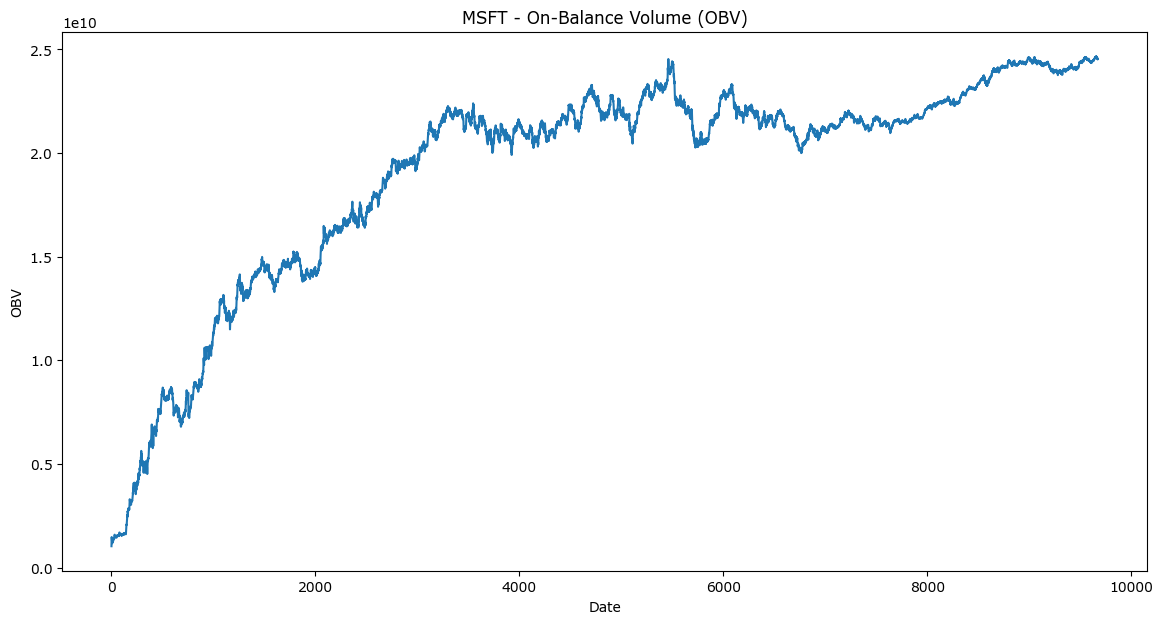

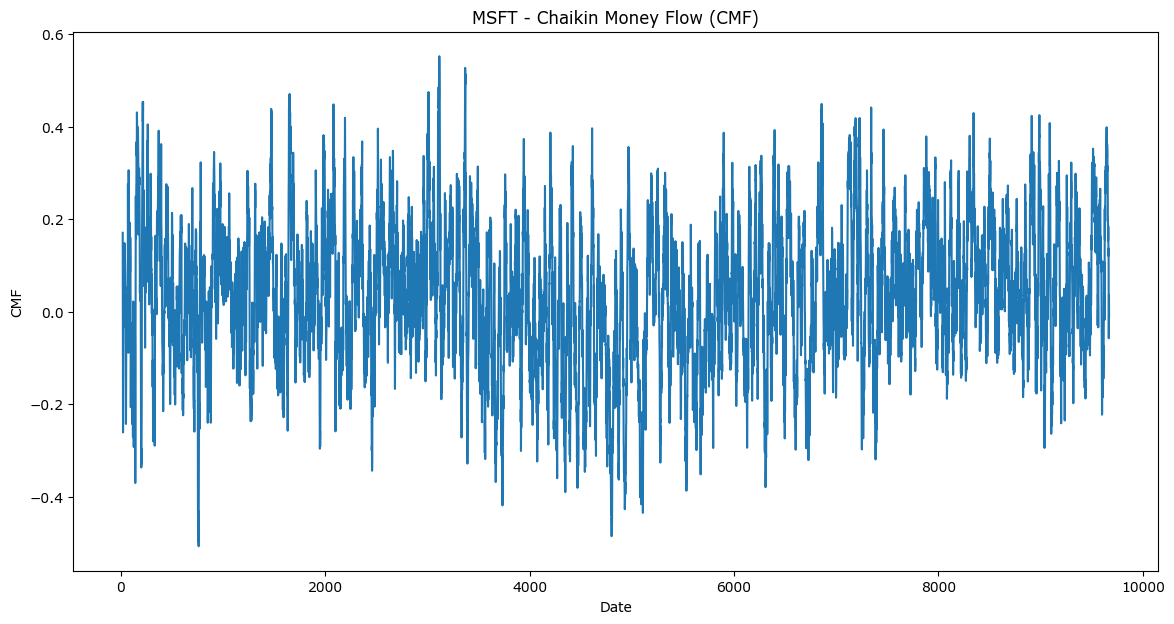

In [8]:
# Usage example
csv_path = r"C:\Users\doff n\Desktop\doffneri\week1\src\yfinance_data\MSFT_historical_data.csv"
analyzer = StockAnalyzer(csv_path, "MSFT")
analyzer.analyze()

## NVDA Analyzer

C:\Users\doff n\AppData\Local\Temp\ipykernel_14016\557101003.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill NaN values


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'SMA20', 'SMA50', 'EMA20', 'EMA50', 'MACD',
       'MACD_Signal', 'MACD_Diff', 'ADX', 'RSI', 'Stoch_K', 'Stoch_D', 'CCI',
       'BB_High', 'BB_Low', 'BB_Mid', 'ATR', 'OBV', 'CMF'],
      dtype='object')
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1 1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2 1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3 1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
4 1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

   Dividends  Stock Splits  SMA20  ...  RSI  Stoch_K  Stoch_D  CCI  BB_High  \
0        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
1        0.0           0.0    NaN  ...  NaN      NaN     

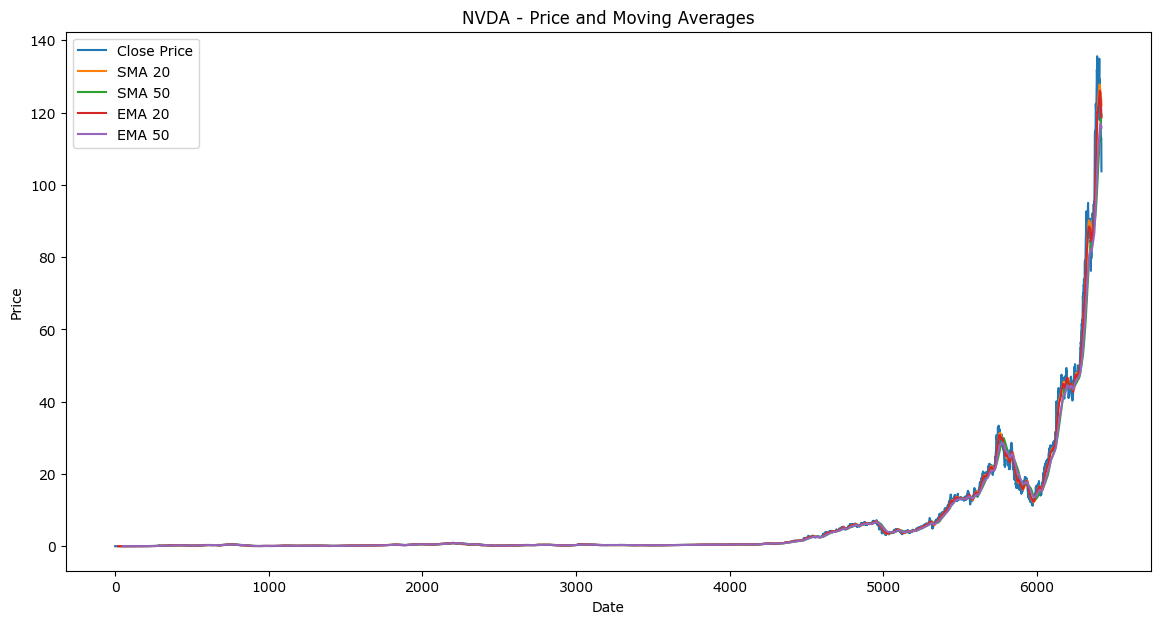

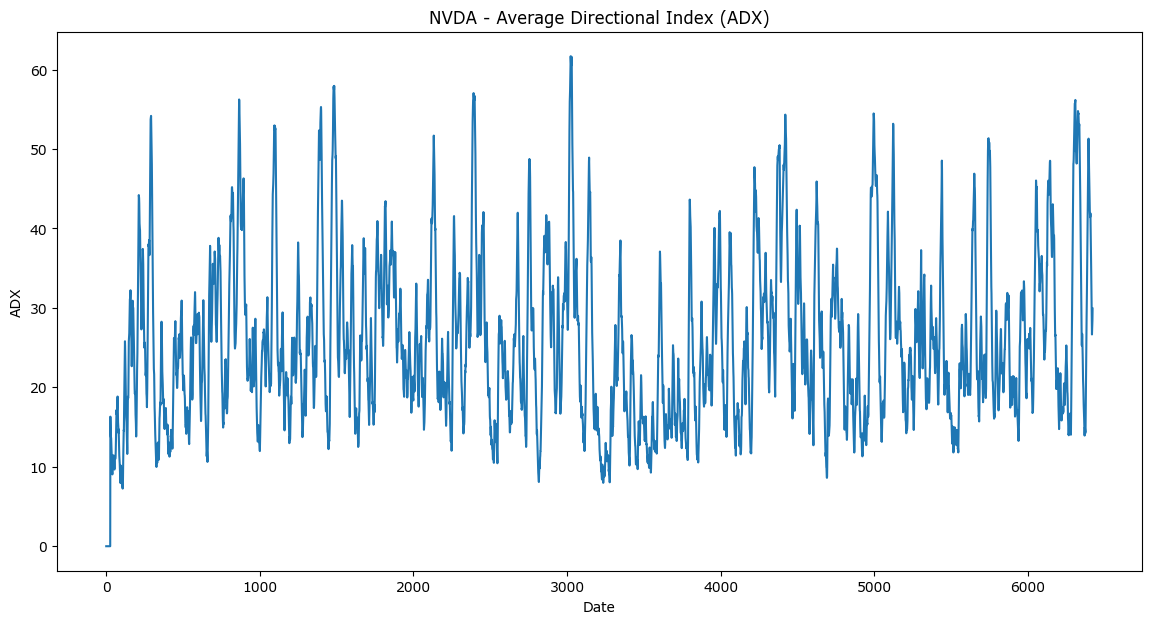

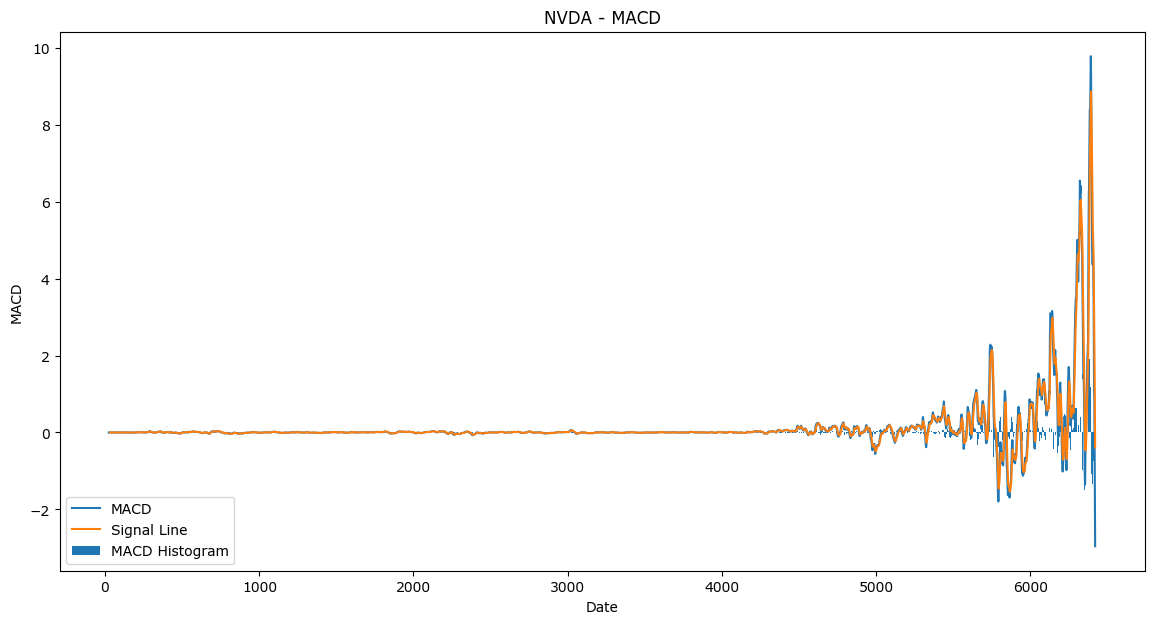

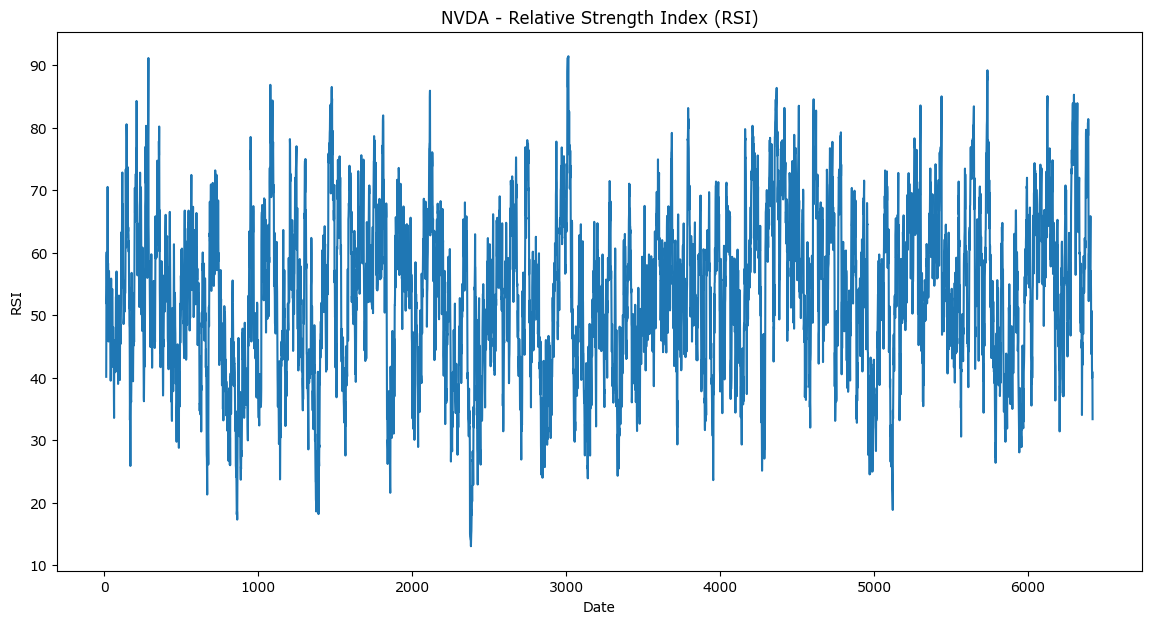

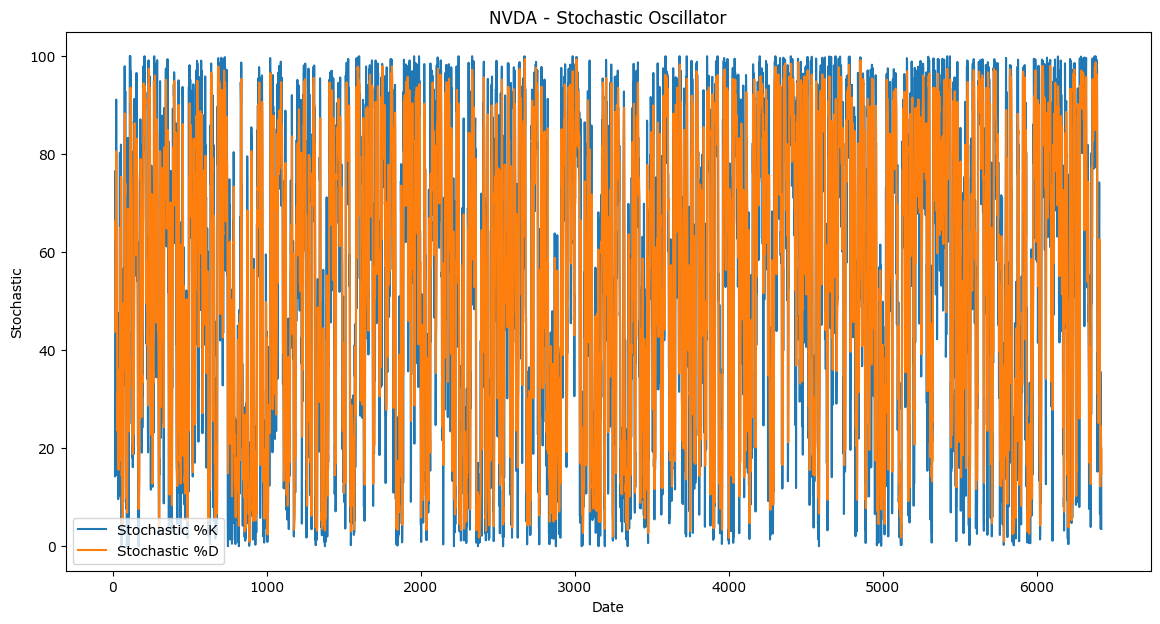

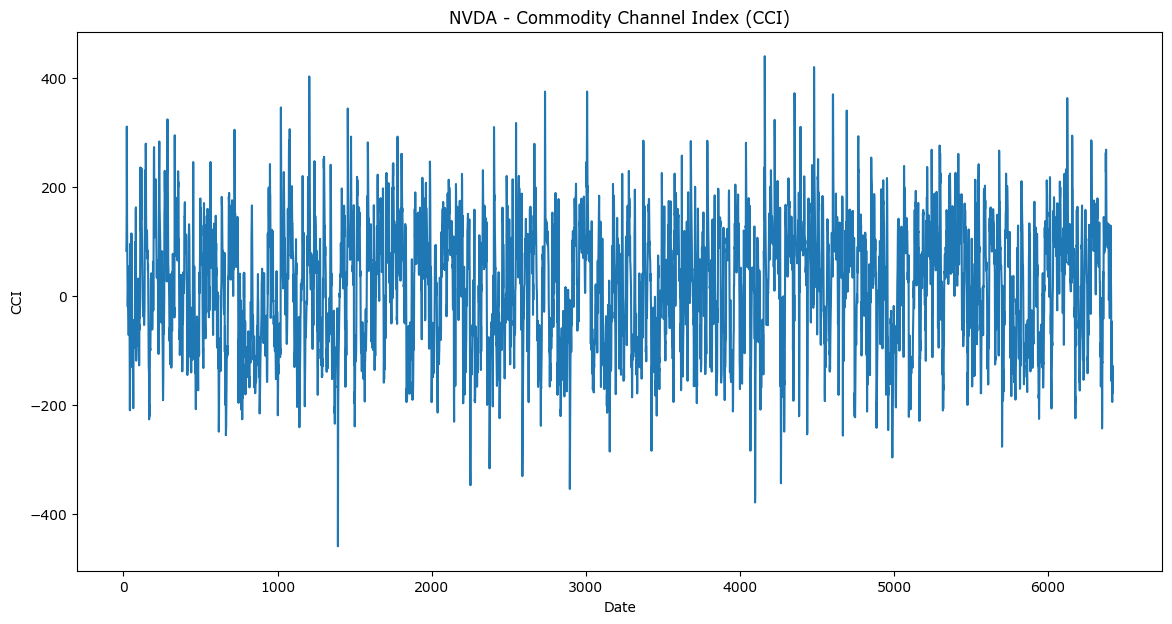

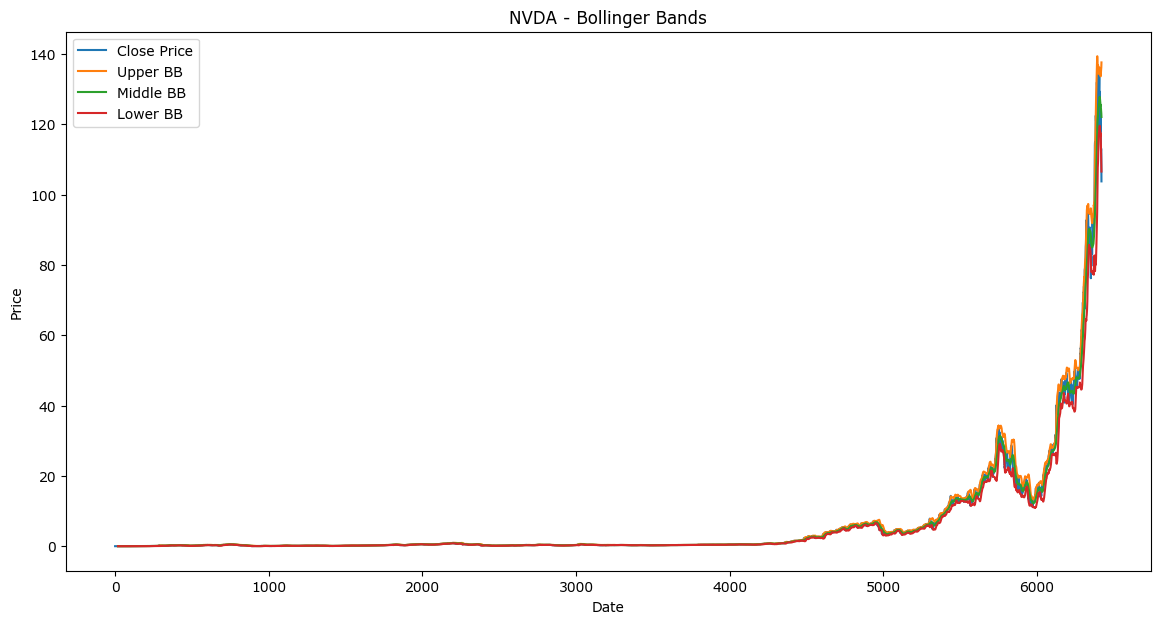

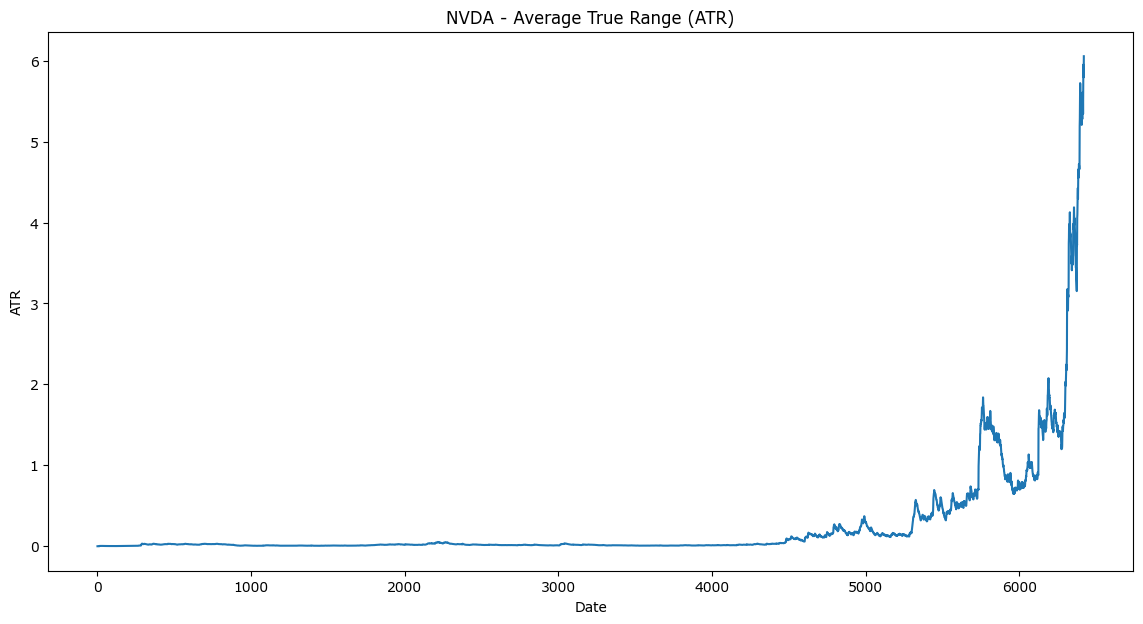

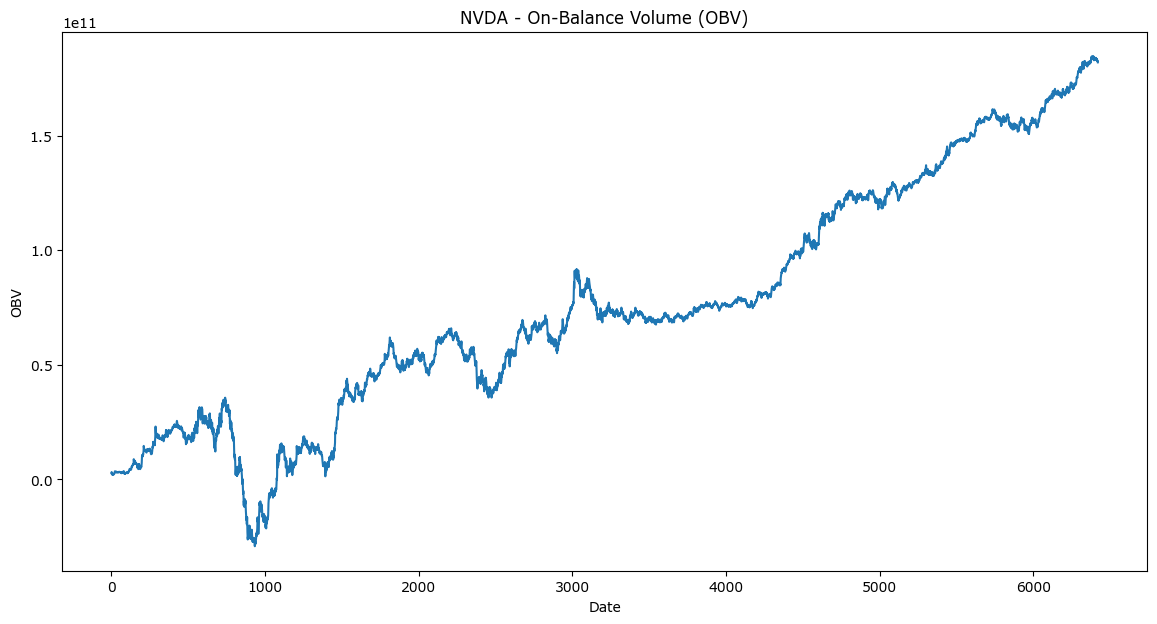

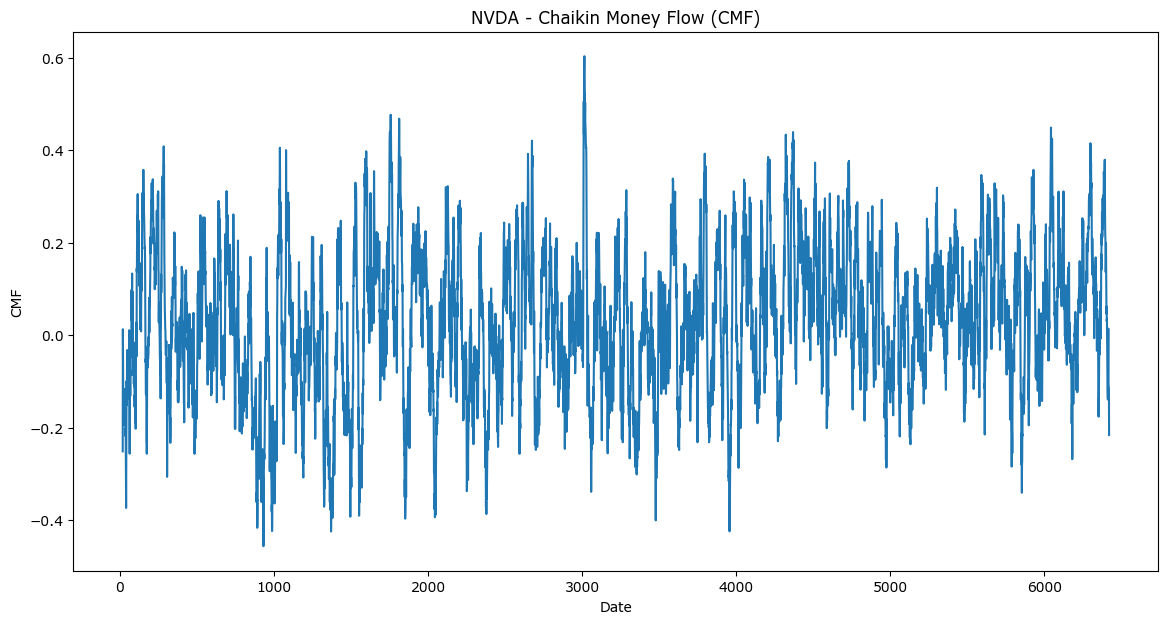

In [9]:
# Usage example
csv_path = r"C:\Users\doff n\Desktop\doffneri\week1\src\yfinance_data\NVDA_historical_data.csv"
analyzer = StockAnalyzer(csv_path, "NVDA")
analyzer.analyze()

## TSLA Analyzer

C:\Users\doff n\AppData\Local\Temp\ipykernel_14016\557101003.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill NaN values


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'SMA20', 'SMA50', 'EMA20', 'EMA50', 'MACD',
       'MACD_Signal', 'MACD_Diff', 'ADX', 'RSI', 'Stoch_K', 'Stoch_D', 'CCI',
       'BB_High', 'BB_Low', 'BB_Mid', 'ATR', 'OBV', 'CMF'],
      dtype='object')
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits  SMA20  ...  RSI  Stoch_K  Stoch_D  CCI  BB_High  \
0        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
1        0.0           0.0    NaN  ...  NaN      NaN      NaN  

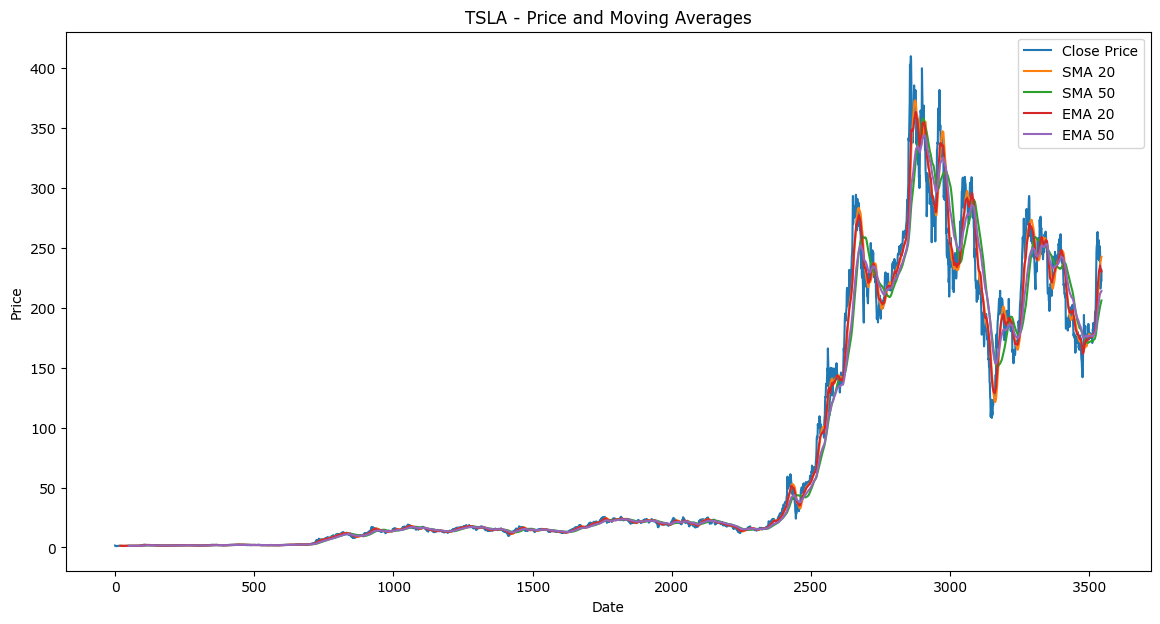

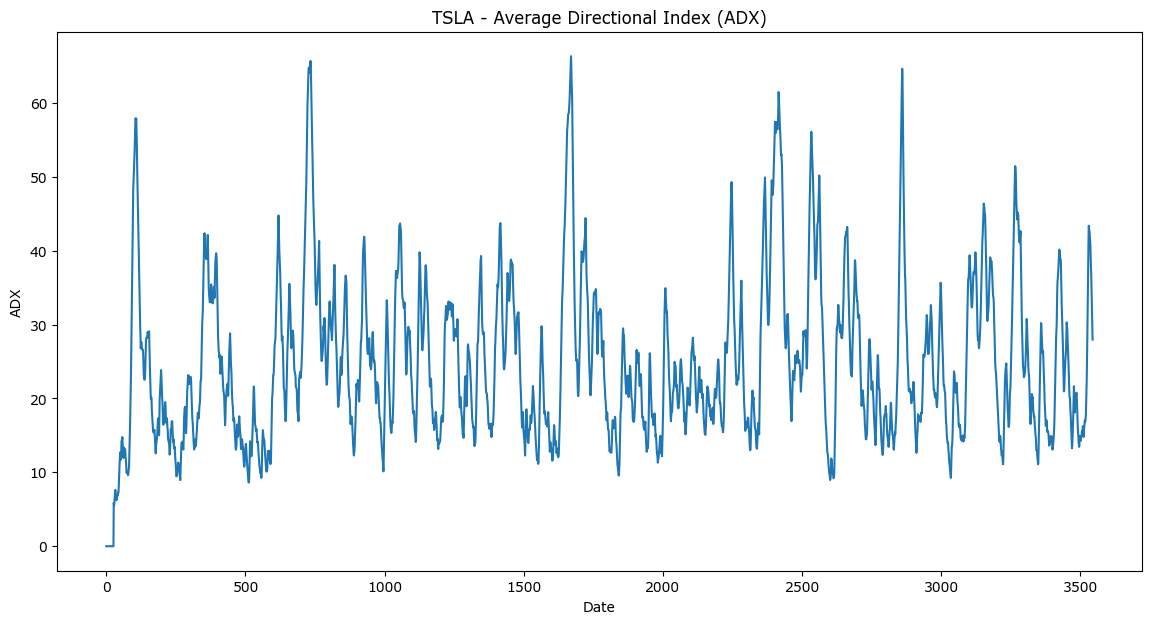

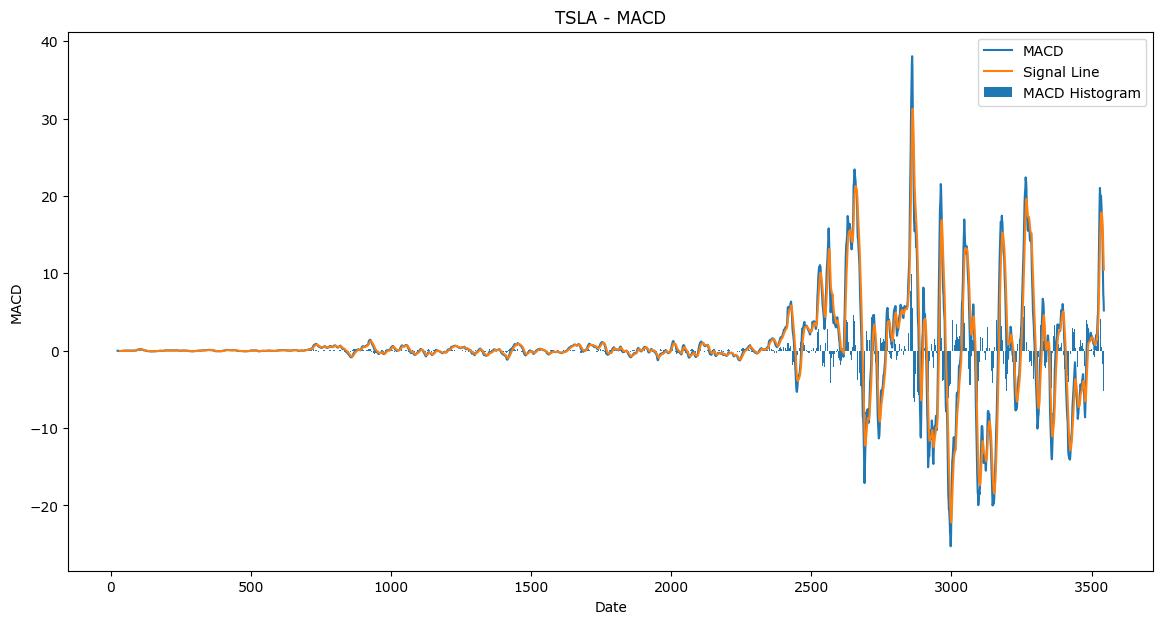

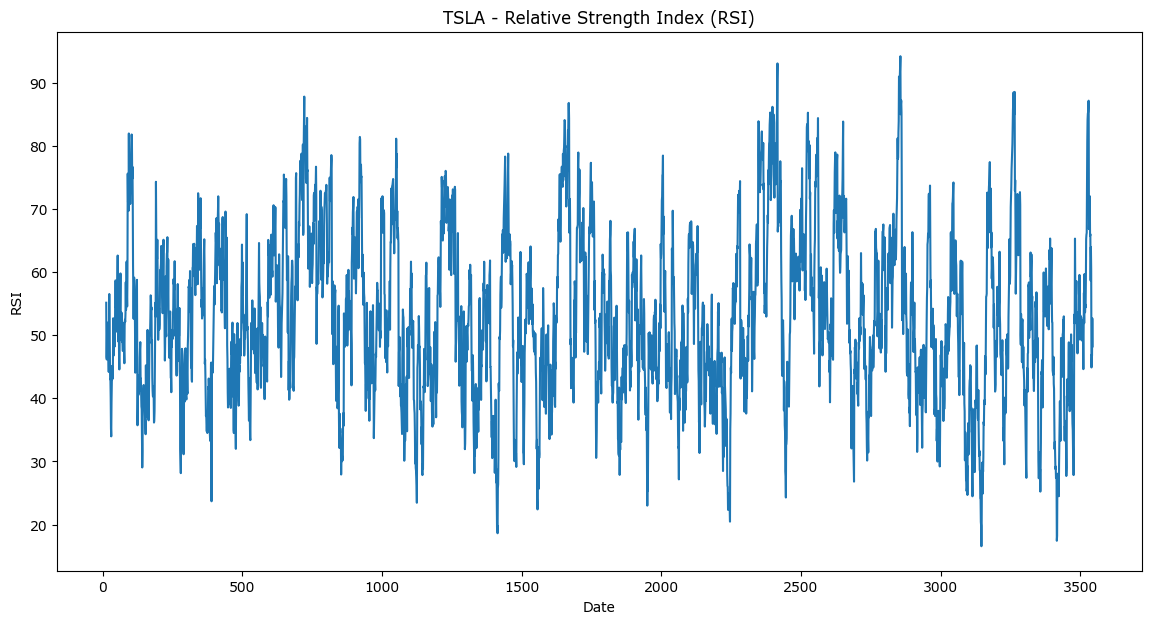

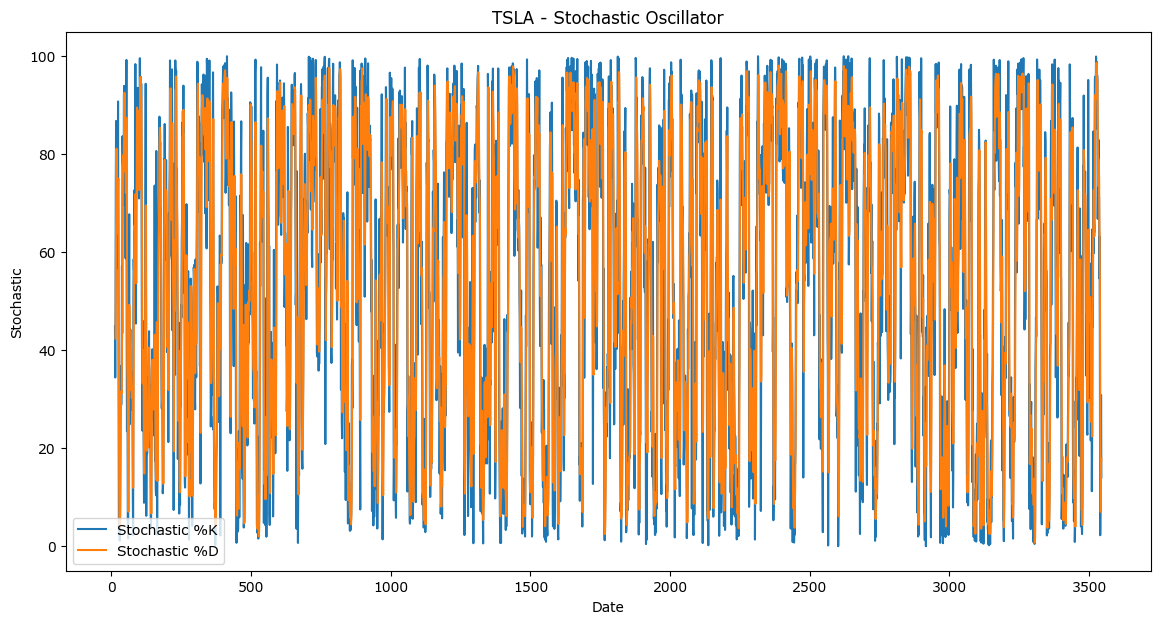

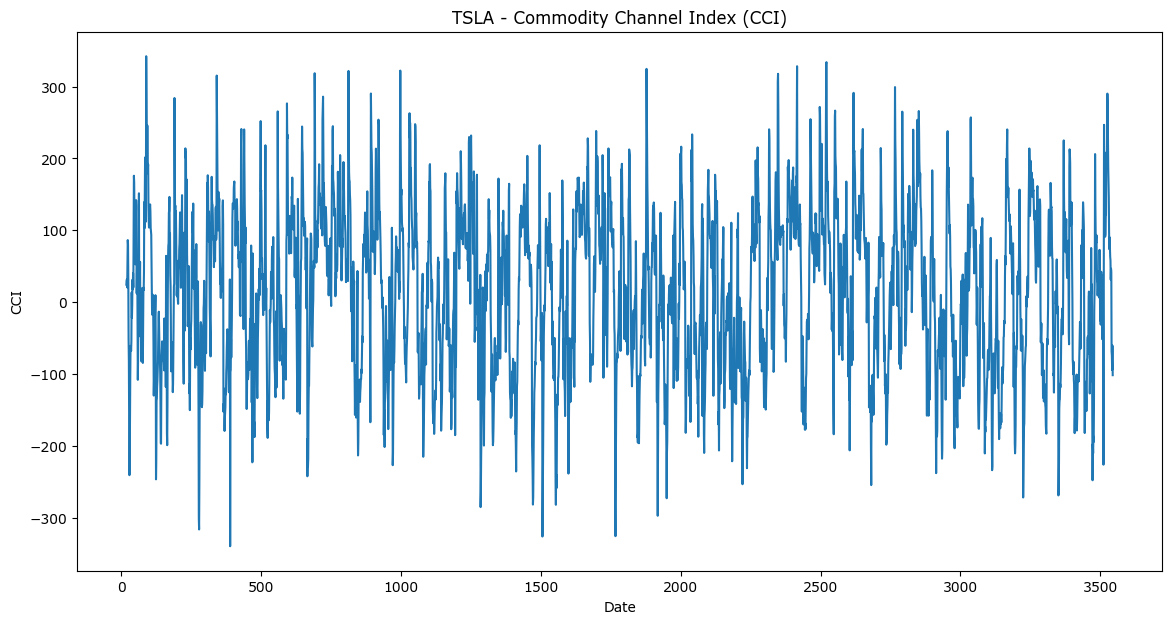

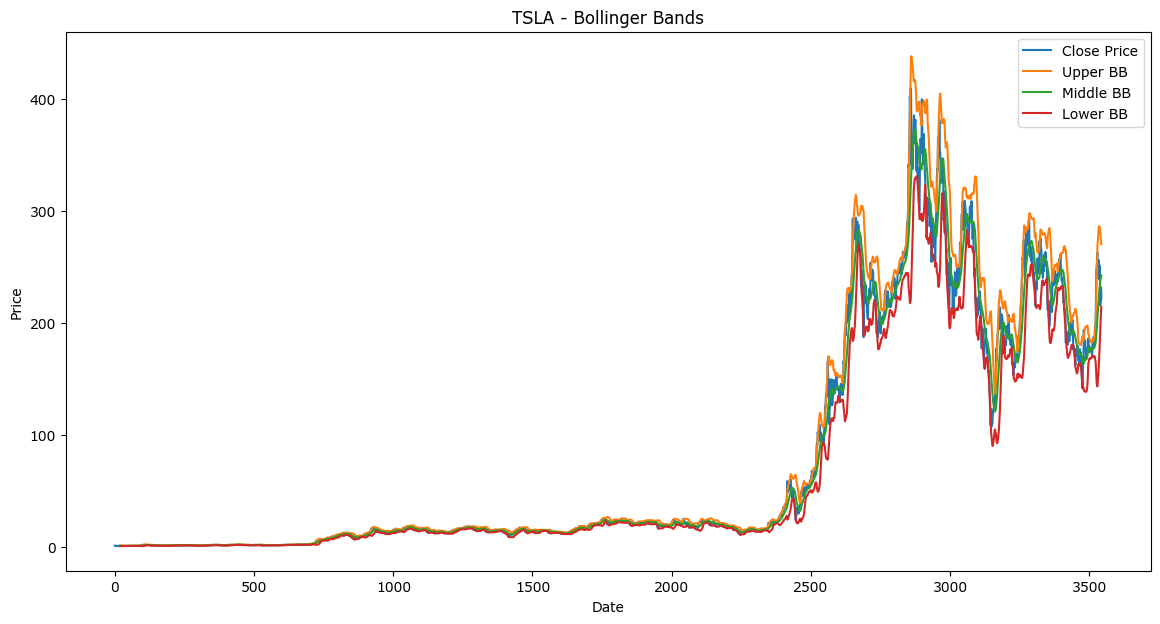

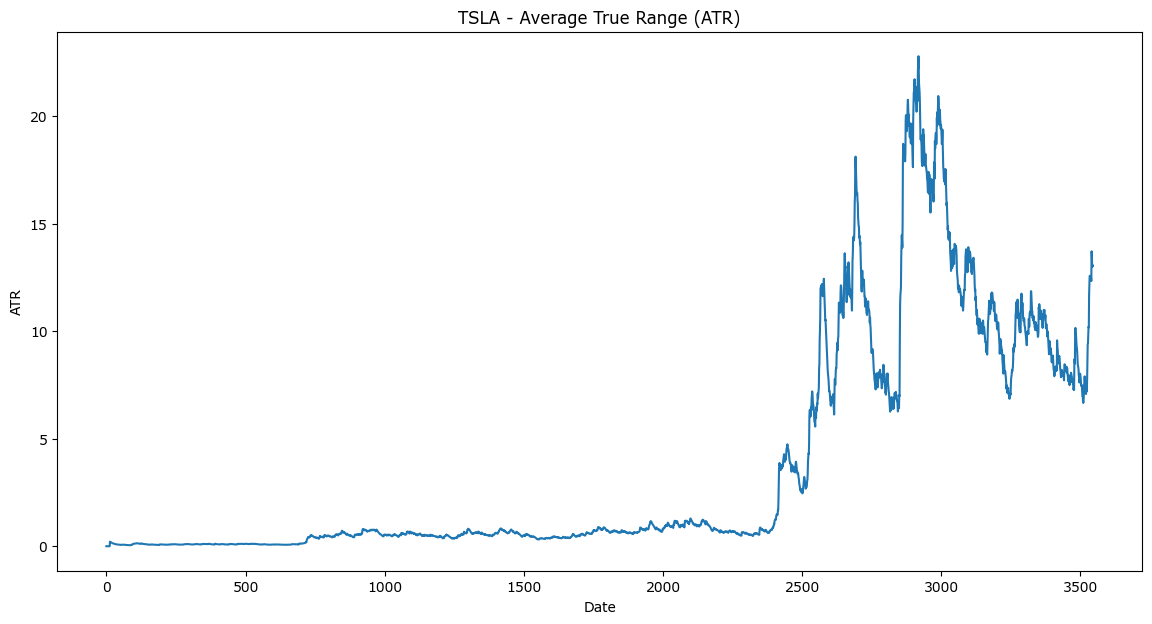

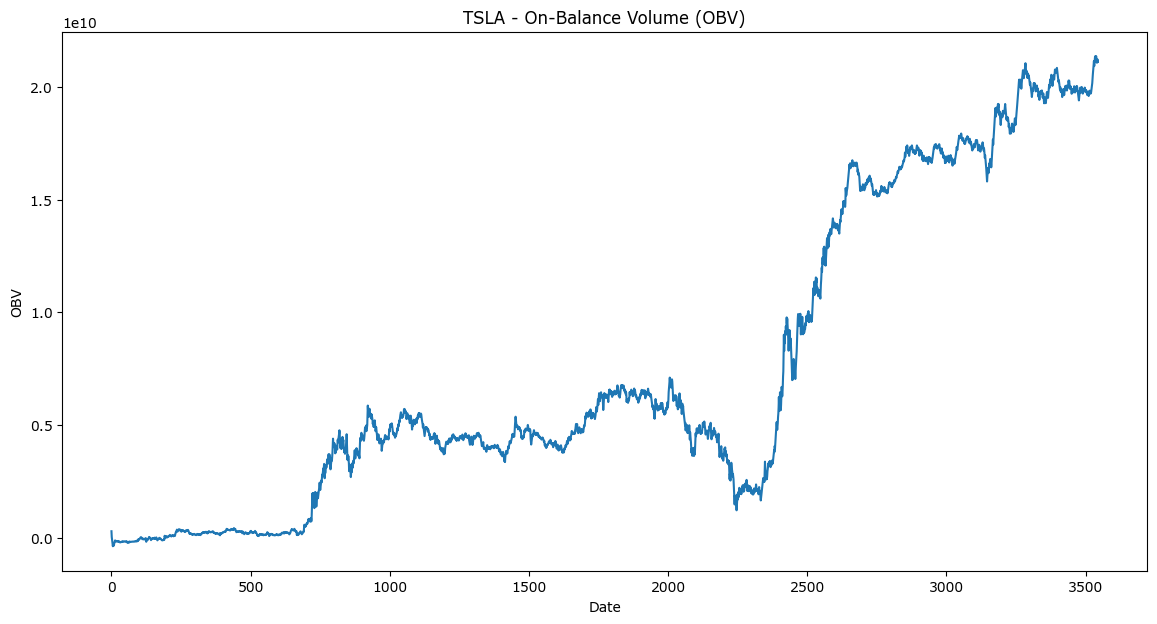

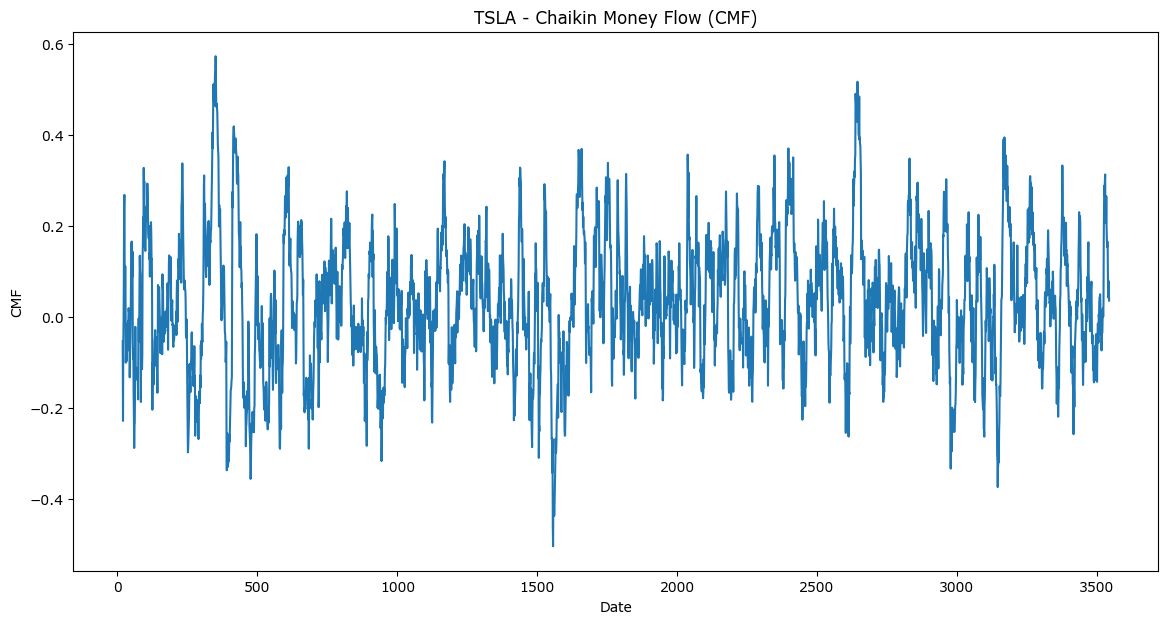

In [10]:
# Usage example
csv_path = r"C:\Users\doff n\Desktop\doffneri\week1\src\yfinance_data\TSLA_historical_data.csv"
analyzer = StockAnalyzer(csv_path, "TSLA")
analyzer.analyze()

 ==================================================== THANK YOU ==========================================